In [ ]:
"""


In [3]:
10

10

In [4]:
from kevlib import common_import_script
%run $common_import_script

import tables

import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
%run $common_import_script
from astropy.io import fits
import kevlib.image as kli
from kevlib.utils.plot import plot_images
from kevlib.utils import fix_byte_order
from astropy.coordinates import SkyCoord
from astroscrappy import detect_cosmics
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans
import lmfit
from kevlib.utils.plot import plot_images
from glob import glob
import urllib.parse
from astropy.io import ascii as astro_ascii
from scipy.ndimage import binary_dilation, binary_erosion

# config = ConfigProto()
# config.gpu_options.allow_growth=True
# sess = InteractiveSession(config=config)

---------------------------------------------------------------------------------------
|                        Last run date: 2025-10-28 01:45 PM E                         |
---------------------------------------------------------------------------------------
| Python | Jupyterlab | Numpy  | Scipy  | Astropy | Matplotlib | Tensorflow | Pytorch |
---------------------------------------------------------------------------------------
| 3.11.4 |   4.4.3    | 1.24.3 | 1.11.1 |  5.3.1  |   3.8.3    |   2.13.1   |  2.0.1  |
---------------------------------------------------------------------------------------


2025-10-28 13:45:45.572039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-28 13:45:46.391932: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


---------------------------------------------------------------------------------------
|                        Last run date: 2025-10-28 01:45 PM E                         |
---------------------------------------------------------------------------------------
| Python | Jupyterlab | Numpy  | Scipy  | Astropy | Matplotlib | Tensorflow | Pytorch |
---------------------------------------------------------------------------------------
| 3.11.4 |   4.4.3    | 1.24.3 | 1.11.1 |  5.3.1  |   3.8.3    |   2.13.1   |  2.0.1  |
---------------------------------------------------------------------------------------


In [3]:
# test_true = np.load("../Nov25_1175_TrueTest.npy")
# test_false = np.load("../Nov25_Clean_FalseTest_925.npy")
# full_test = []
# for i in test_true:
#     full_test.append(i)
# for i in test_false:
#     full_test.append(i) 

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image_grid(images, grid_shape=(4, 4), image_shape=None, cmap='gray', figsize=(7, 7), titles=None):

    rows, cols = grid_shape
    assert images.shape[0] >= rows * cols, "Not enough images to fill the grid"

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i in range(rows * cols):
        img = images[i]
        if image_shape is not None:
            img = img.reshape(image_shape)
        axes[i].imshow(img, cmap=cmap)
        axes[i].axis('off')
        if titles and i < len(titles):
            axes[i].set_title(titles[i], fontsize=8)

    plt.tight_layout()
    plt.show()


In [162]:
# plot_image_grid(true_set[625:], (5,2))

In [163]:
plt.close()

In [52]:

f1 = np.load("./TrainingData/FalseSet/10k_Lshape_synthetic.npy")
f2 = np.load("./TrainingData/FalseSet/1k_streaks_andbadmask.npy")
f3 = np.load("./TrainingData/FalseSet/20k_synth_V_shapes.npy")
f4 = np.load("./TrainingData/FalseSet/20k_synth_plus_shapes.npy")
f5 = np.load("./TrainingData/FalseSet/280k_blank_false_images.npy")
f6 = np.load("./TrainingData/FalseSet/40ksynth_streaks.npy")
f7 = np.load("./TrainingData/FalseSet/4k_augmented_real_streaks.npy")
f8 = np.load("./TrainingData/FalseSet/50k_synth_hot_pixels_part1_falsetrainingset_S1shiftedbkgs.npy")
f9 = np.load("./TrainingData/FalseSet/80k_augmented_bad_masks.npy")
f10 = np.load("./TrainingData/FalseSet/23k_ombres_from_v1_S1_search_augmented.npy")


false_set= np.concatenate((f1,f2,f3,f4,f10,f6,f7,f8,f9,f5), axis=0)
len(false_set) + len(true_set)

509023

In [55]:
 len(true_set)

447748

In [107]:
# plot_images(list(f9[0:36]), n_rows=  6, fig_height=2, norm_same=False)

In [53]:
true_set  = np.load("./TrainingData/TrueSet/Final_True_Bkg_parts/447k_Synth_Images_June23_snr3_V1.npy")
true_centers = np.load("./TrainingData/TrueSet/Final_True_Bkg_parts/447k_Centers_June23_snr3_V1.npy")
len(true_set)

447748

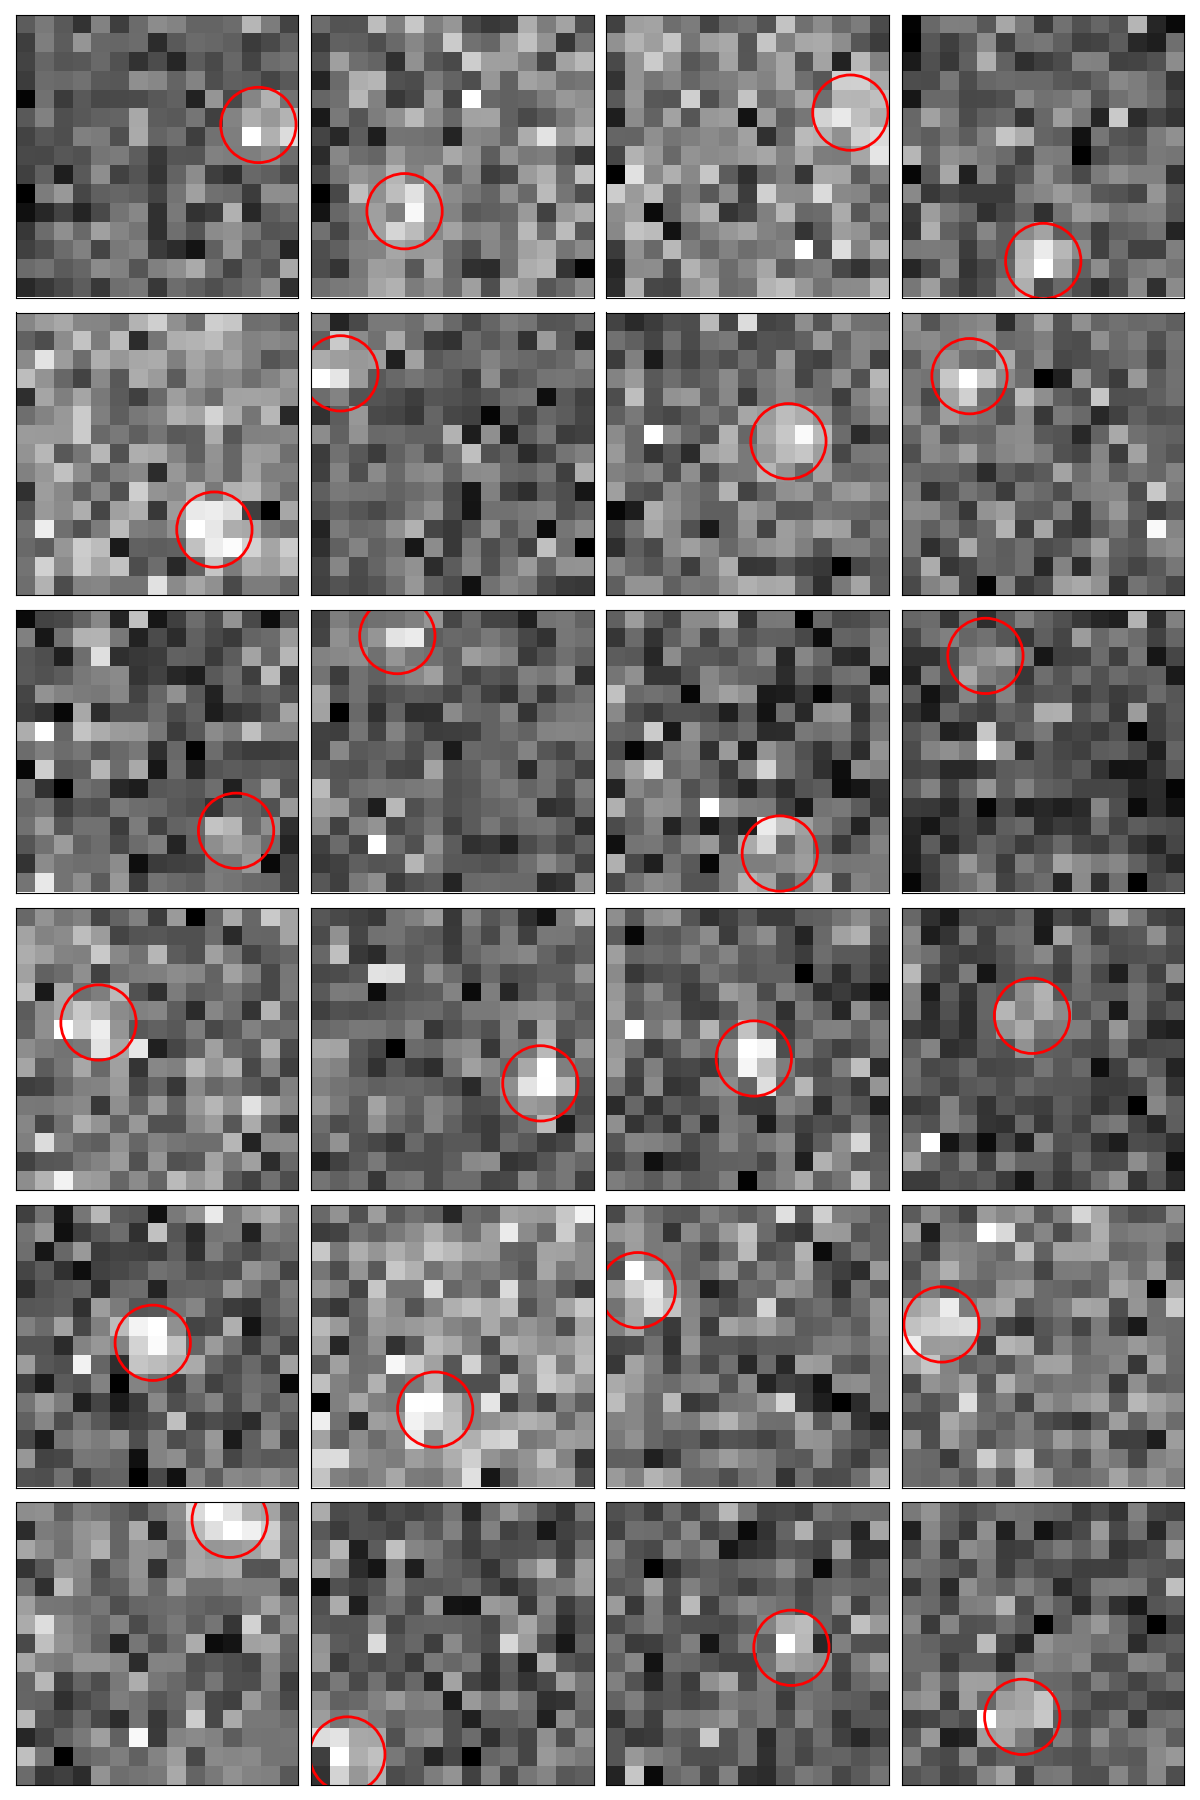

In [165]:
# plot_images(list(true_set[0:100]), fig_height=2, n_rows=10)

import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

subset_images= true_set
subset_images = np.expand_dims(subset_images, axis=-1)

nrows, ncols = 6, 4
num_plots = nrows * ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))
axes = axes.flatten()

for i in range(num_plots):
    ax = axes[i]
    if i >= len(subset_images):
        ax.axis('off')
        continue
    
    img_2d = subset_images[i, :, :, 0]
    ax.imshow(img_2d, origin='lower', cmap='gray')

    # Draw the predicted coordinate as a red circle
    x_pred, y_pred = true_centers[i]
    circle = patches.Circle((x_pred, y_pred), radius=2.0, fill=False,
                            edgecolor='red', linewidth=2)
    ax.add_patch(circle)

    ax.set_xlim(-0.5, 14.5)
    ax.set_ylim(-0.5, 14.5)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [6]:
total_len = len(false_set) + len(true_set)

In [8]:
len(false_set)

509023

In [29]:
from tensorflow.keras.utils import Sequence
class PyTablesSequence(Sequence):

    def __init__(self, x_arr, y_arr, batch_size, buffer_size=2048, filt=None):

        assert buffer_size % batch_size == 0

        self.x, self.y = x_arr, y_arr
        self.batch_size = batch_size
        self.buffer_size = buffer_size
        self.next_load = 0
        self.filter = filt

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        # print(idx)
        idx = idx * self.batch_size
        
        if idx >= self.next_load or idx < self.next_load - self.buffer_size:
            
            if self.filter is not None:
                valid = self.filter[idx:idx + self.buffer_size]
                self.x_block = self.x[idx:idx + self.buffer_size][valid]
                self.y_block = self.y[idx:idx + self.buffer_size][valid]
            else:
                self.x_block = self.x[idx:idx + self.buffer_size]
                self.y_block = self.y[idx:idx + self.buffer_size]
            
            indexes = np.random.permutation(len(self.x_block))
            self.x_block = self.x_block[indexes]
            self.y_block = self.y_block[indexes]
            self.next_load = idx + self.buffer_size

        block_index = idx - (self.next_load - self.buffer_size)
        batch_x = self.x_block[block_index:block_index + self.batch_size]
        batch_y = self.y_block[block_index:block_index + self.batch_size]

        #batch_x[~np.isfinite(batch_x)] = 0

        return batch_x, batch_y




In [5]:

proc_hardware_choice = 1

# ----------------------------------------

if proc_hardware_choice == 0:
    proc_hardware_name = '/gpu:0'
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    
elif proc_hardware_choice == 1:
    proc_hardware_name = '/gpu:1'
    os.environ['CUDA_VISIBLE_DEVICES'] = '1'
    
elif proc_hardware_choice == 2:
    proc_hardware_name = '/cpu:0'
    os.environ['CUDA_VISIBLE_DEVICES'] = ''
else:
    print('ERROR: You didnt make a proper choice. Defaulting to CPU processing.')
    proc_hardware_name = '/cpu:0'
    
print('Using hardware name =', proc_hardware_name)

Using hardware name = /gpu:1


# Load Data in Desired Model Version

In [16]:
1-0.85

0.15000000000000002

In [14]:
total_len * 0.85

813255.35

In [32]:

# version = 2

# save_path = f'./data/v{version}'

# sample_shape = (15, 15)

# set_configs = dict(
#     train=dict(
#         n_samples=int(total_len * 0.9)
#     ),
#     validation=dict(
#         n_samples=int(total_len * 0.05),
#     ),
#     test=dict(
#         n_samples=int(total_len * 0.05),
#     ),
# )

# os.makedirs(save_path, exist_ok=True)

# import tables

# atom = tables.Float32Atom()

# for set_name, set_config in set_configs.items():

#     n_samples = int(set_config['n_samples'] / 2 ) - 1

#     try:
#         fileh.close()
#     except:
#         pass

#     dataset_path = opj(save_path, f"{set_name}_v{version}.h5")

#     fileh = tables.open_file(dataset_path, mode='w')

#     earray_kwargs = dict(where=fileh.root, atom=atom, expectedrows=n_samples)

#     samples_x = fileh.create_earray(
#         name='x',  
#         title="x",
#         shape=(0, *sample_shape), 
#         **earray_kwargs,
#     )

#     samples_y = fileh.create_earray(
#         name='y', 
#         title="y",
#         shape=(0,), 
#         **earray_kwargs,
#     )
    
#     samples_aux = fileh.create_earray(
#         name='aux', 
#         title="aux",
#         shape=(0,), 
#         **earray_kwargs,
#     )
    
#     for i in tqdm(range(n_samples), desc=f"{set_name} data"):
        
#         im = true_set[i]
        
#         samples_x.append(im[None, :, :])
#         samples_y.append([1.0])
        
#         im = false_set[i]
        
#         samples_x.append(im[None, :, :])
#         samples_y.append([0.0])
#         # samples_aux.append(params)
        
#     try:
#         fileh.close()
#     except:
#         pass

# print('Done!')import os, tables, numpy as np

import os, tables, numpy as np
from os.path import join as opj
from tqdm import tqdm

version      = 2
save_path    = f'./data/v{version}'
sample_shape = (15, 15)
os.makedirs(save_path, exist_ok=True)

n_true   = len(true_set)
n_false  = len(false_set)
min_len  = min(n_true, n_false) 

n_train_pairs = int(min_len * 0.90)
n_val_pairs   = int(min_len * 0.05)
n_test_pairs  = min_len - n_train_pairs - n_val_pairs 

perm = np.random.permutation(min_len)

splits = {
    'train'     : perm[:n_train_pairs],
    'validation': perm[n_train_pairs : n_train_pairs + n_val_pairs],
    'test'      : perm[n_train_pairs + n_val_pairs : ],
}

extra_false_idx = np.random.permutation(np.arange(min_len, n_false))

atom = tables.Float32Atom()

for set_name in ('train', 'validation', 'test'):

    idx = splits[set_name]


    try: fileh.close()
    except: pass

    fileh = tables.open_file(opj(save_path, f"{set_name}_v{version}.h5"), mode='w')

    samples_x  = fileh.create_earray(where=fileh.root, name='x',   title='x',
                                     atom=atom, shape=(0, *sample_shape))
    samples_y  = fileh.create_earray(where=fileh.root, name='y',   title='y',
                                     atom=atom, shape=(0,))
    samples_aux= fileh.create_earray(where=fileh.root, name='aux', title='aux',
                                     atom=atom, shape=(0,))


    for i in tqdm(idx, desc=f"{set_name} balanced"):
        samples_x.append(true_set [i][None, :, :]); samples_y.append([1.0])
        samples_x.append(false_set[i][None, :, :]); samples_y.append([0.0])


    if set_name == 'train' and n_false > min_len:
        for j in tqdm(extra_false_idx, desc="train extra-false"):
            samples_x.append(false_set[j][None, :, :])
            samples_y.append([0.0])       # label = false

    fileh.close()

print("Done!")


test balanced: 100%|██████████| 22388/22388 [00:01<00:00, 19112.55it/s]


Done!


In [33]:
len(true_set), len(false_set)

(447748, 509023)

# Save Training Data

# Train Model

In [31]:
# plot_images(samples_x[-1])

In [101]:
# Load datasets

version = 2

batch_size = 32
buffer_size = 320

# ---------------------------------------------------------------------------

train_fileh = tables.open_file(f'./data/v{version}/train_v{version}.h5', mode="r")

train_seq = PyTablesSequence(
    train_fileh.root.x, train_fileh.root.y, 
    batch_size=batch_size, 
    buffer_size=buffer_size,
)

# ---------------------------------------------------------------------------

val_fileh = tables.open_file(f'./data/v{version}/validation_v{version}.h5', mode="r")

val_seq = PyTablesSequence(
    val_fileh.root.x, val_fileh.root.y, 
    batch_size=batch_size, 
    buffer_size=buffer_size,
)

# ---------------------------------------------------------------------------

test_fileh = tables.open_file(f'./data/v{version}/test_v{version}.h5', mode="r")

test_seq = PyTablesSequence(
    test_fileh.root.x, test_fileh.root.y, 
    batch_size=batch_size, 
    buffer_size=buffer_size,
)

data_shape = train_seq[0][0].shape[1:]

print('Loaded images are shape =', data_shape)

In [61]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, Input, Dropout, Flatten, Reshape,
    Convolution2D, MaxPooling2D
)

tf.keras.backend.clear_session()

# # ---------------------------------------------------------------------------

# # def build_model_1(input_shape): # increase kernel size
    
# #     input = Input(shape=input_shape) # shape of data - 30x30
# #     x = Reshape((*data_shape, 1))(input)  # programs are written for 3 channels - RGB, but we reshape for two dimension images that are only 30,30,1
# #     x = Convolution2D(32, (3, 3), activation='relu')(x) # filter (# of kernels), kernel size, activation func - wikipedia --> 
# #     x = MaxPooling2D((2, 2))(x) # 2x2 groups of pixels become 1 pixel
# #     x = Convolution2D(64, (3, 3), activation='relu')(x) 
# #     x = MaxPooling2D((2, 2))(x)
# #     x = Flatten()(x) # turn the 3d array to a 1d vector
# #     x = Dense(512, activation='relu')(x) # 
# #     x = Dropout(0.5)(x) # reset 50% of the data to 0 - generalize teh model to prevent overfitting/memorizing
# #     x = Dense(256, activation='relu')(x)  # 256 neurons
# #     x = Dropout(0.5)(x)
# #     output = Dense(1, activation='sigmoid')(x)  # https://stackoverflow.com/questions/54103770/object-localization-keras-predicts-the-whole-image act was sigmoid and 1
    
# #     model = Model(input, output)
    
# #     return model

def build_model_v2(input_shape):
    # Input and reshape to add the channel dimension (15x15 -> 15x15x1)
    input_tensor = Input(shape=input_shape)
    x = Reshape((*input_shape, 1))(input_tensor)

    # Kernel sizes: 

    # First conv+pool block
    x = Convolution2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    # Second conv+pool block
    x = Convolution2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    # Third conv+pool block (added)
    x = Convolution2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    # Fourth conv+pool block (added)
    x = Convolution2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    # Flatten and add fully connected layers
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    # Output layer with sigmoid activation for binary classification
    output = Dense(1, activation='sigmoid')(x)
    
    model = Model(input_tensor, output)
    return model

from tensorflow.keras.layers import (
    Input, Reshape, Conv2D, BatchNormalization,
    MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense
)
from tensorflow.keras.models import Model

def build_model_v3(input_shape):

    input_tensor = Input(shape=input_shape)
    x = Reshape((*input_shape, 1))(input_tensor)

    # Block 1
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)            # 8×8×32

    # Block 2
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)            # 4×4×64

    # Block 3
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)            # 4×4×128

    # Global feature aggregation
    x = GlobalAveragePooling2D()(x)        # 128-D vector
    x = Dropout(0.3)(x)                    # regularization

    # Binary classifier head
    output = Dense(1, activation='sigmoid')(x)

    model = Model(input_tensor, output, name="build_model_v3")
    return model


with tf.device(proc_hardware_name):
    
    model = build_model_v3(data_shape)
    
    model.summary()

Model: "build_model_v3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 15)]          0         
                                                                 
 reshape (Reshape)           (None, 15, 15, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 15, 15, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 15, 15, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)       

In [62]:
model_version = 3
models_base_path = './data/models'

In [63]:
model_checkpoint_dir = opj(models_base_path, f'model_v{model_version}', 'checkpoints')
model_checkpoint_fp = opj(model_checkpoint_dir, 'checkpoint.hdf5')

In [64]:
# --------------------------------------------------------------------------

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from livelossplot import PlotLossesKerasTF

with tf.device(proc_hardware_name):
    
    # Set opatimizer and optimization options
    optimizer = Adam(learning_rate=1e-4)
    
    # Compile the model (required)
    model.compile(
        loss='binary_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy'],
    )
    
    # Setup training checkpoint callback
    model_checkpoint_fp = opj(model_checkpoint_dir, 'checkpoint.hdf5')
    
    model_checkpoint_callback = ModelCheckpoint(
        model_checkpoint_fp,
        monitor='val_loss',
        save_best_only=True,
    )
    
    # Define all callbacks, which TF will call on after each training epoch finishes
    callbacks = [
        model_checkpoint_callback,  # Make checkpoints
        PlotLossesKerasTF(),        # Show training progress (model accuracy and loss)
    ]


In [79]:
# model.data

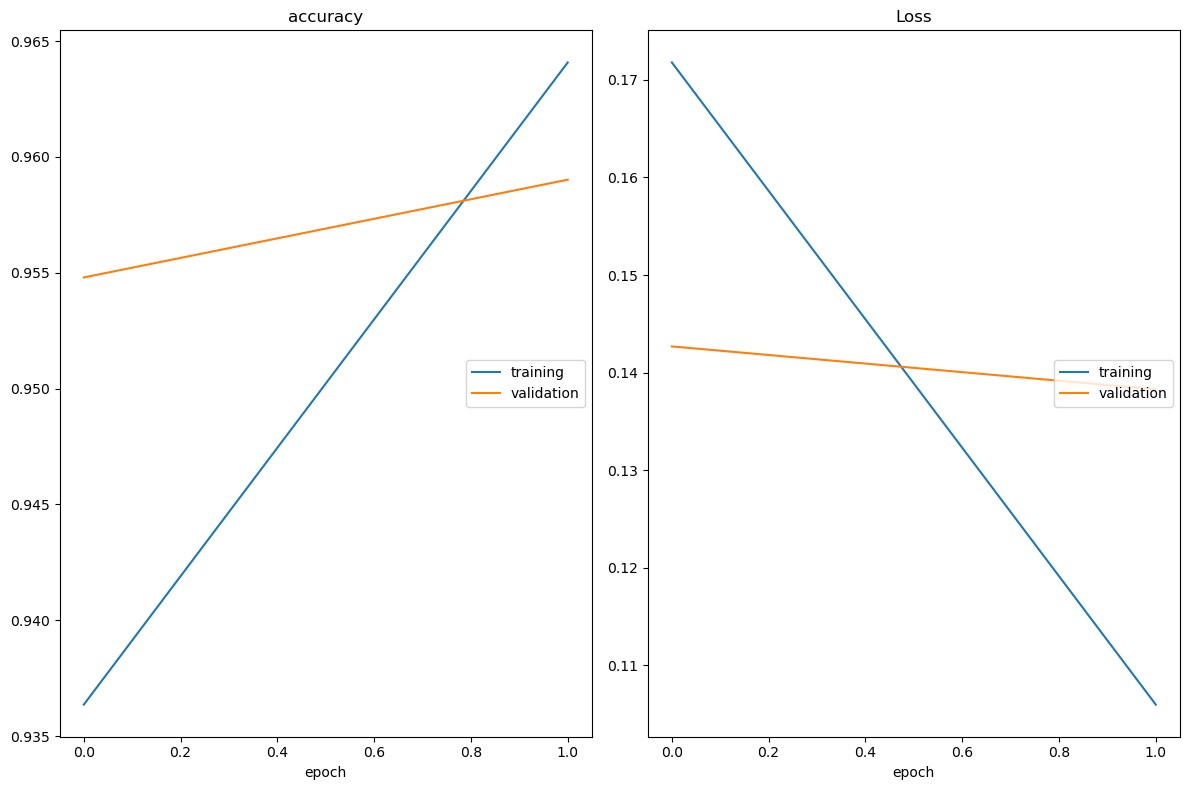

accuracy
	training         	 (min:    0.936, max:    0.964, cur:    0.964)
	validation       	 (min:    0.955, max:    0.959, cur:    0.959)
Loss
	training         	 (min:    0.106, max:    0.172, cur:    0.106)
	validation       	 (min:    0.138, max:    0.143, cur:    0.138)
27101/27101 [==============================] - 182s 7ms/step - loss: 0.1060 - accuracy: 0.9641 - val_loss: 0.1383 - val_accuracy: 0.9590


In [65]:
# Train the model!

n_epochs = 2


max_queue_size = 50

# You can press the stop button in jupyter if you feel that its trained enough and further
# training wont improve considerably.

# Make sure plots are "inline" not "notebook". Required for progress plots to work.
%matplotlib inline

with tf.device(proc_hardware_name):
    
    model.fit(
        x=train_seq,
        validation_data=val_seq,
        batch_size=batch_size,
        epochs=n_epochs,
        max_queue_size=max_queue_size,
        callbacks=callbacks,
        # steps_per_epoch=312,  # Enable to limit number of batches per epoch
    )

In [66]:
print(model_checkpoint_fp)
model.load_weights(model_checkpoint_fp)
model.save(opj(models_base_path, f'model_v{model_version}', 'saved_model'))

./data/models/model_v3/checkpoints/checkpoint.hdf5
INFO:tensorflow:Assets written to: ./data/models/model_v3/saved_model/assets


INFO:tensorflow:Assets written to: ./data/models/model_v3/saved_model/assets


In [6]:
import tensorflow as tf
model = tf.keras.models.load_model('./data/models/model_v3/checkpoints/checkpoint.hdf5')

2025-10-28 13:47:14.673932: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6448 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:17:00.0, compute capability: 7.5


In [154]:
len(full_test)

3389195

In [7]:
p = np.load("../2025Work/15px_W2_masks_real_asteroids_randomized.npy")
n = np.load("../2025Work/TrainingData/March19_True_Training_Bkgs_134k-Copy1.npy")

f_test = np.concatenate((p,n[0:100]), axis=0)

pos_vals = np.ones((len(p)))
neg_vals = np.zeros((100))
full_test_vals= np.concatenate((pos_vals,neg_vals), axis=0)

In [21]:
plt.close()

In [159]:
# len(test_set_predictions)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, 
                             roc_auc_score, roc_curve, auc, confusion_matrix)

# test_fileh = tables.open_file(f'./data/v2/test_v2.h5', mode="r")

# with tf.device(proc_hardware_name):
#     # test_set_predictions_known = model.predict(f_test).flatten()
#     test_set_predictions = model.predict(test_fileh.root.x[:]).flatten()

#     test_set_predictions_rounded = np.int8(test_set_predictions > 0.5)


p = np.load("../2025Work/15px_W2_masks_real_asteroids_randomized.npy")
n = np.load("../2025Work/TrainingData/March19_True_Training_Bkgs_134k-Copy1.npy")
f_test = np.concatenate((p,n[0:100]), axis=0)
pos_vals = np.ones((len(p)))
neg_vals = np.zeros((100))
full_test_vals= np.concatenate((pos_vals, neg_vals), axis=0)
with tf.device(proc_hardware_name):
    test_set_predictions_known = model.predict(f_test).flatten()
    test_set_predictions_rounded_known = np.int8(test_set_predictions_known > 0.4)
    

# Assuming full_test_vals contains the ground truth labels
test_set_gt = full_test_vals
# test_set_gt = test_fileh.root.y[:] # Extract all ground truths for this test set

# List of metric functions to print results
stat_funcs = [
    ['Accuracy  = ', accuracy_score],
    ['Precision = ', precision_score],
    ['Recall    = ', recall_score],
    ['f1        = ', f1_score],
    ['ROC AUC   = ', roc_auc_score],
]

# Print evaluation metrics (note: ROC AUC uses continuous predictions)
[print(f"{n}{f(test_set_gt, test_set_predictions_rounded_known if f != roc_auc_score else test_set_predictions):.2f}") 
 for (n, f) in stat_funcs]

# Compute ROC curve using continuous prediction probabilities
fpr, tpr, thresholds = roc_curve(test_set_gt, test_set_predictions_known)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, ".-b", label=f"Training-Split Test Set ROC curve (area = {roc_auc:.2f})")


fpr, tpr, thresholds = roc_curve(full_test_vals, test_set_predictions_known)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, ".-r", label=f"Real Asteroid Test Set ROC curve (area = {roc_auc:.2f})")


plt.plot([0, 1], [0, 1], 'k--', label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Classification CNN Receiver \nOperating Characteristic Curve")
plt.legend(loc="lower right")
plt.show()

print(fpr)

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Compute the confusion matrix
# cm = confusion_matrix(test_set_gt, test_set_predictions_rounded_known)

# # Plot the confusion matrix using matplotlib's imshow
# plt.figure(figsize=(4, 4))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.colorbar()



# classes = ['0', '1']
# tick_marks = np.arange(len(classes))
# plt.xticks(tick_marks, classes)
# plt.yticks(tick_marks, classes)

# # Annotate the cells with their counts
# thresh = cm.max() / 2.
# for i in range(cm.shape[0]):
#     for j in range(cm.shape[1]):
#         plt.text(j, i, format(cm[i, j], 'd'),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.tight_layout()
# plt.show()


7/7 [==============================] - 0s 2ms/step
Accuracy  = 0.90
Precision = 0.96
Recall    = 0.82
f1        = 0.89


NameError: name 'test_set_predictions' is not defined

In [39]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import (
#     accuracy_score, f1_score, precision_score, recall_score, 
#     roc_auc_score, roc_curve, auc, confusion_matrix
# )
# import tensorflow as tf

# p = np.load("../2025Work/15px_W2_masks_real_asteroids_randomized.npy")
# n = np.load("../2025Work/TrainingData/March19_True_Training_Bkgs_134k-Copy1.npy")

# f_test = np.concatenate((p, n[0:100]), axis=0)
# pos_vals = np.ones(len(p))
# neg_vals = np.zeros(100)
# full_test_vals = np.concatenate((pos_vals, neg_vals), axis=0)


# test_fileh = tables.open_file(f'./data/v2/test_v2.h5', mode="r")

# with tf.device(proc_hardware_name):
#     # test_set_predictions = model.predict(test_fileh.root.x[:]).flatten()
#     test_predictions = model.predict(f_test).flatten()

# # full_test_vals = test_fileh.root.y[:]

# threshold = 0.4
# test_pred_labels = np.int8(test_predictions > threshold)

# metrics = {
#     "Accuracy": accuracy_score(full_test_vals, test_pred_labels),
#     "Precision": precision_score(full_test_vals, test_pred_labels),
#     "Recall": recall_score(full_test_vals, test_pred_labels),
#     "F1 Score": f1_score(full_test_vals, test_pred_labels),
#     "ROC AUC": roc_auc_score(full_test_vals, test_predictions),
# }

# print("\n=== Model Evaluation on Real Test Set ===")
# for name, value in metrics.items():
#     print(f"{name:<10} = {value:.4f}")


# cm = confusion_matrix(full_test_vals, test_pred_labels)
# classes = ['Non-Asteroid', 'Asteroid']

# plt.figure(figsize=(6, 6))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title("Confusion Matrix: 100 Real Asteroid Test", fontsize=16, pad=20)
# plt.colorbar(fraction=0.046, pad=0.04)

# tick_marks = np.arange(len(classes))
# plt.xticks(tick_marks, classes, rotation=0, fontsize=14)
# plt.yticks(tick_marks, classes, fontsize=14)

# thresh = cm.max() / 2.
# for i in range(cm.shape[0]):
#     for j in range(cm.shape[1]):
#         plt.text(j, i, format(cm[i, j], 'd'),
#                  ha="center", va="center",
#                  fontsize=16,
#                  color="white" if cm[i, j] > thresh else "black")
        
# tn, fp, fn, tp = cm.ravel()
# fpr_single = fp / (fp + tn)
# print(f"\nSingle-threshold FPR (at {threshold:.2f}) = {fpr_single:.4f}")


# plt.ylabel("True Label", fontsize=16, labelpad=10)
# plt.xlabel("Predicted Label", fontsize=16, labelpad=10)
# plt.tight_layout(pad=2.0)
# plt.show()

7/7 [==============================] - 0s 2ms/step

=== Evaluation: 100 Real Asteroid Test ===
Accuracy   = 0.8950
Precision  = 0.9647
Recall     = 0.8200
F1 Score   = 0.8865
ROC AUC    = 0.9497
Single-threshold FPR (at 0.40) = 0.0300


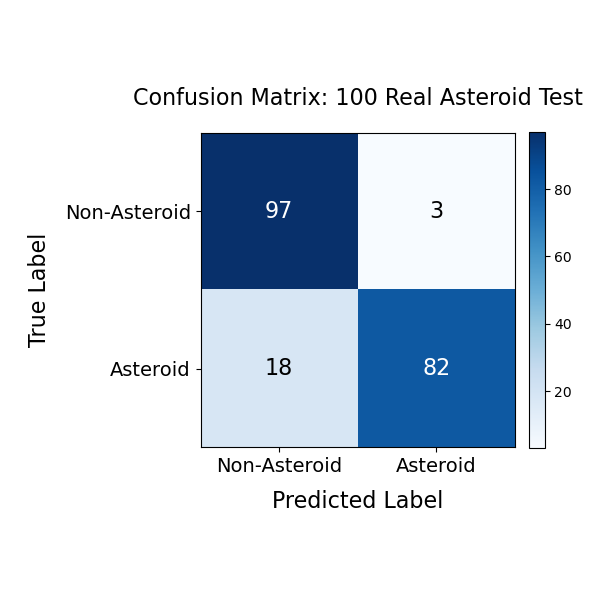

1400/1400 [==============================] - 2s 2ms/step

=== Evaluation: HDF5 Test_v2 Split ===
Accuracy   = 0.9628
Precision  = 0.9776
Recall     = 0.9474
F1 Score   = 0.9622
ROC AUC    = 0.9936
Single-threshold FPR (at 0.40) = 0.0218


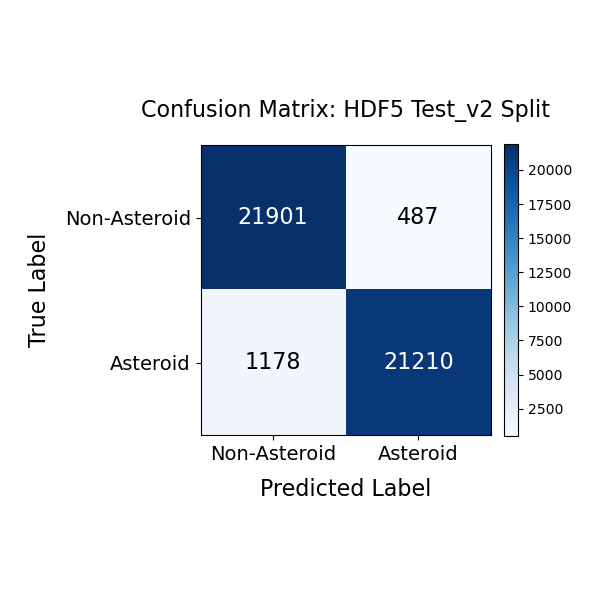


=== Summary Comparison ===
           Accuracy  Precision  Recall  F1 Score  ROC AUC
Real Test    0.8950     0.9647  0.8200    0.8865   0.9497
HDF5 Test    0.9628     0.9776  0.9474    0.9622   0.9936


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, 
    roc_auc_score, confusion_matrix
)
import tensorflow as tf
import tables


p = np.load("../2025Work/15px_W2_masks_real_asteroids_randomized.npy")
n = np.load("../2025Work/TrainingData/March19_True_Training_Bkgs_134k-Copy1.npy")
f_test = np.concatenate((p, n[0:100]), axis=0)
pos_vals = np.ones(len(p))
neg_vals = np.zeros(100)
full_test_vals = np.concatenate((pos_vals, neg_vals), axis=0)

test_fileh = tables.open_file('./data/v2/test_v2.h5', mode="r")
x_h5 = test_fileh.root.x[:]
y_h5 = test_fileh.root.y[:]

def evaluate_model(X, y_true, model, threshold=0.4, name="Test Set"):
    with tf.device(proc_hardware_name):
        preds = model.predict(X).flatten()

    preds_rounded = np.int8(preds > threshold)

    metrics = {
        "Accuracy": accuracy_score(y_true, preds_rounded),
        "Precision": precision_score(y_true, preds_rounded),
        "Recall": recall_score(y_true, preds_rounded),
        "F1 Score": f1_score(y_true, preds_rounded),
        "ROC AUC": roc_auc_score(y_true, preds),
    }

    print(f"\n=== Evaluation: {name} ===")
    for k, v in metrics.items():
        print(f"{k:<10} = {v:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_true, preds_rounded)
    tn, fp, fn, tp = cm.ravel()
    fpr_single = fp / (fp + tn)
    print(f"Single-threshold FPR (at {threshold:.2f}) = {fpr_single:.4f}")

    # Plot confusion matrix
    classes = ['Non-Asteroid', 'Asteroid']
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {name}", fontsize=16, pad=20)
    plt.colorbar(fraction=0.046, pad=0.04)

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center", fontsize=16,
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel("True Label", fontsize=16, labelpad=10)
    plt.xlabel("Predicted Label", fontsize=16, labelpad=10)
    plt.tight_layout(pad=2.0)
    plt.show()

    return metrics, cm

real_metrics, real_cm = evaluate_model(f_test, full_test_vals, model, threshold=0.4, name="100 Real Asteroid Test")

h5_metrics, h5_cm = evaluate_model(x_h5, y_h5, model, threshold=0.4, name="HDF5 Test_v2 Split")

import pandas as pd

df_compare = pd.DataFrame([real_metrics, h5_metrics], index=["Real Test", "HDF5 Test"])
print("\n=== Summary Comparison ===")
print(df_compare.round(4))

In [100]:
plt.close()

# Find ideal threshold


Optimal threshold (maximizing TPR - FPR): 0.3748
At this threshold: TPR = 0.8400, FPR = 0.0300
Threshold for FPR ≤ 0.05: 0.3013
TPR at this threshold: 0.8500


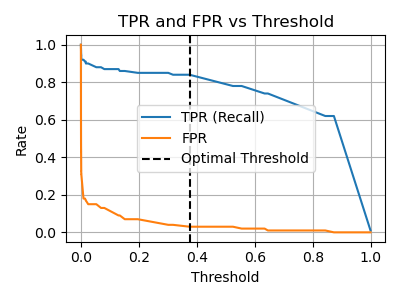

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(full_test_vals, test_predictions)

J = tpr - fpr
ix = np.argmax(J)
optimal_threshold = thresholds[ix]

print(f"\n   Optimal threshold (maximizing TPR - FPR): {optimal_threshold:.4f}")
print(f"At this threshold: TPR = {tpr[ix]:.4f}, FPR = {fpr[ix]:.4f}")

target_fpr = 0.05
below_target = np.where(fpr <= target_fpr)[0]
if len(below_target) > 0:
    ix_lowfpr = below_target[-1]  # last index before exceeding target
    threshold_lowfpr = thresholds[ix_lowfpr]
    print(f"Threshold for FPR <= {target_fpr}: {threshold_lowfpr:.4f}")
    print(f"TPR at this threshold: {tpr[ix_lowfpr]:.4f}")
else:
    print(f"No threshold found with FPR <=  {target_fpr}")

plt.figure(figsize=(4,3))
plt.plot(thresholds, tpr, label='TPR (Recall)')
plt.plot(thresholds, fpr, label='FPR')
plt.axvline(optimal_threshold, color='k', linestyle='--', label='Optimal Threshold')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('TPR and FPR vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# View test set incorrect predictions

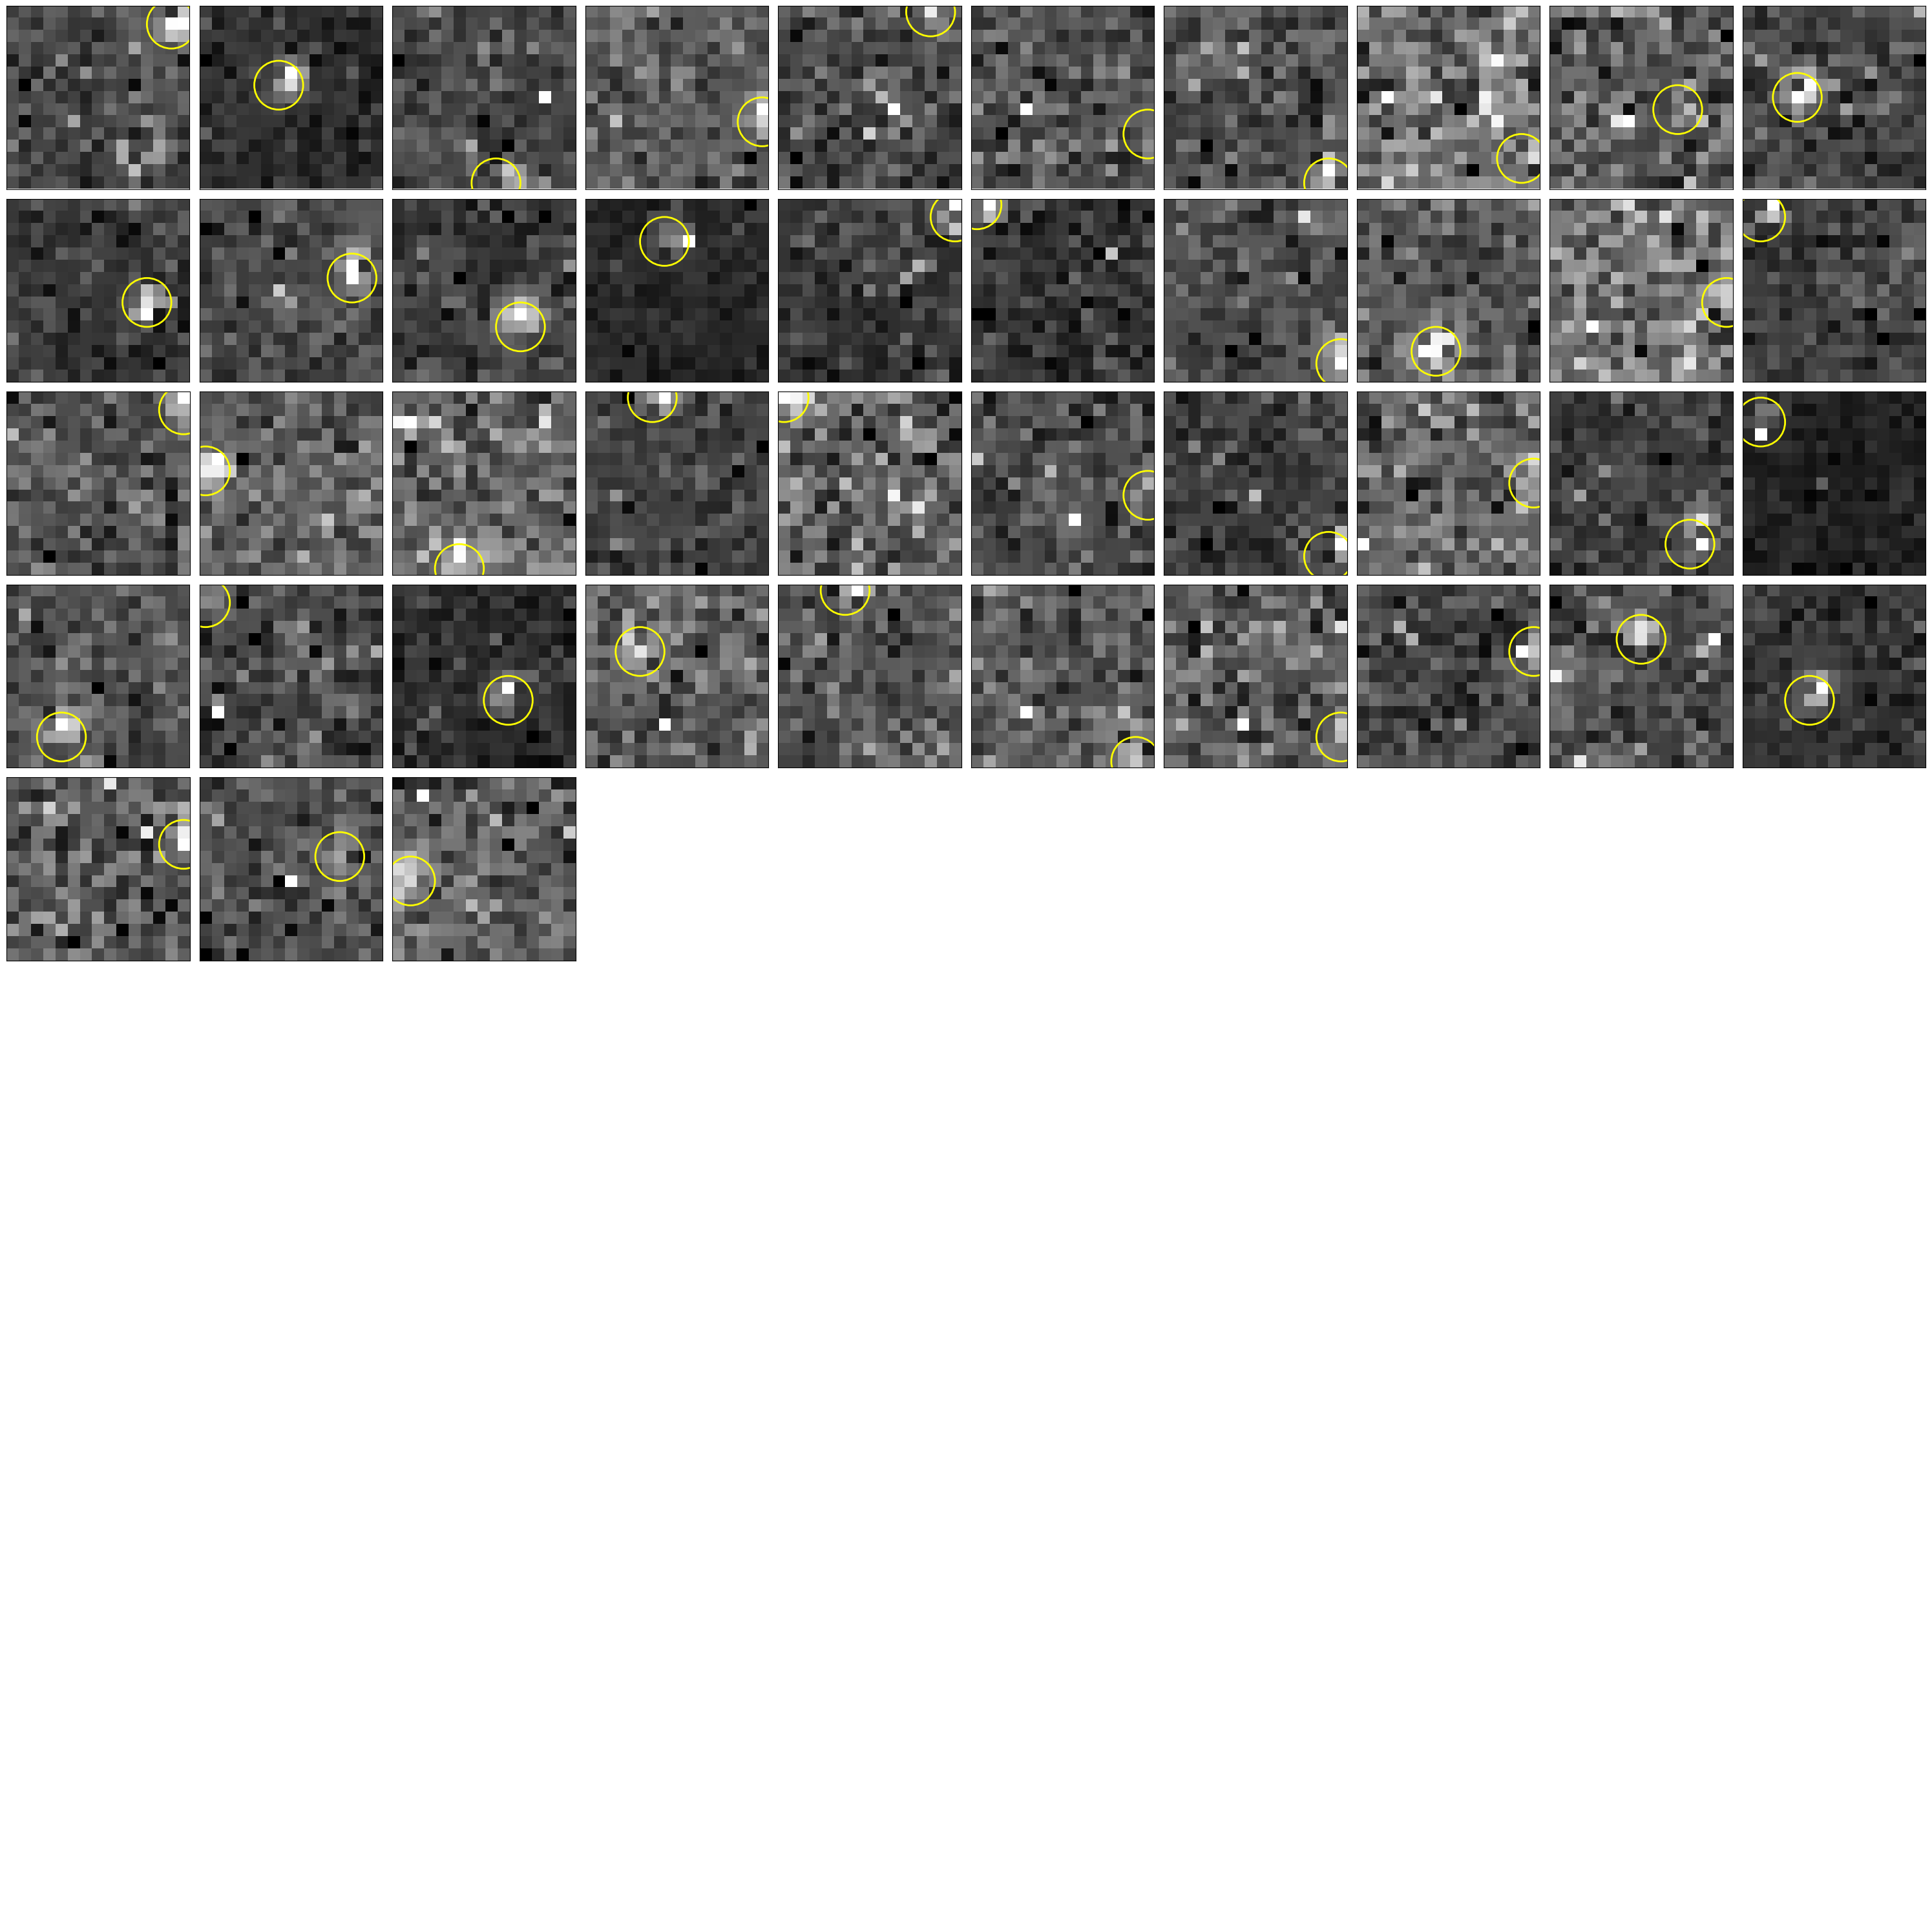

In [150]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

threshold = 0.9
centers = np.load("../2025Work/15px_W2_masks_randomized_coords.npy")
subset_images = [f_test[i] for i in range(len(f_test)) if (test_set_predictions_known[i] <= threshold) & (test_set_gt[i] == 1.0)]
subset_images = np.array(subset_images)
coords = [centers[i] for i in range(len(f_test)) if (test_set_predictions_known[i] <= threshold) & (test_set_gt[i] == 1.0)]

nrows, ncols = 10, 10
num_plots = nrows * ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))
axes = axes.flatten()

for i in range(num_plots):
    ax = axes[i]
    if i >= len(subset_images):
        ax.axis('off')
        continue
    
    # Show the image
    img_2d = subset_images[i, :, :]
    ax.imshow(img_2d, origin='lower', cmap='gray')

    # Draw the predicted coordinate as a red circle
    x_pred, y_pred = coords[i]
    circle = patches.Circle((x_pred, y_pred), radius=2.0, fill=False,
                            edgecolor='yellow', linewidth=2)
    ax.add_patch(circle)

    ax.set_xlim(-0.5, 14.5)
    ax.set_ylim(-0.5, 14.5)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [127]:
plt.close()

In [39]:
import numpy as np
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_set_gt, test_set_predictions)

# Calculate Youden’s J for each threshold
J = tpr - fpr

# Find the threshold that maximizes J
ix = np.argmax(J)
best_threshold = thresholds[ix]

print(f"Best threshold by Youden's J = {best_threshold:.3f}")
print(f"TPR at this threshold = {tpr[ix]:.3f}")
print(f"FPR at this threshold = {fpr[ix]:.3f}")


Best threshold by Youden's J = 0.251
TPR at this threshold = 0.964
FPR at this threshold = 0.034


# Deploy CNN : BLIND SEARCH

In [1]:
import tensorflow as tf
model = tf.keras.models.load_model('./data/models/model_v3/checkpoints/checkpoint.hdf5') # New one that works

2025-10-22 01:42:36.885573: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-22 01:42:37.660005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2025-10-22 01:42:39.266255: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 931 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5
2025-10-22 01:42:39.266911: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6518 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:17:00.0, compute capability: 7.5


In [18]:
# %pip install pydot
# %pip install graphviz
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_v3_arch.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
model.summary()

Model: "build_model_v3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 15)]          0         
                                                                 
 reshape (Reshape)           (None, 15, 15, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 15, 15, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 15, 15, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)       

In [3]:
from kevlib.utils.io import mmcreate, mmload


In [5]:
full_test = mmload("./Searches/2_S1_DarkPixelsRemoved_Normalized_FinalDeployGrids.npy")

In [75]:
for i, im in enumerate(full_test[1000000:]):
    if np.all(im == 0.0):
        print(i)
        break

In [6]:
len(full_test)

3389195

In [80]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, 
                             roc_auc_score, roc_curve, auc, confusion_matrix)


with tf.device(proc_hardware_name):
    
    test_set_predictions = model.predict(full_test).flatten()
    
    test_set_predictions_rounded = np.int8(test_set_predictions > 0.4)

print("done with inference")

pos = [full_test[i] for i in range(len(full_test)) if test_set_predictions_rounded[i]==1]
# neg = [full_test[i] for i in range(len(full_test)) if test_set_predictions_rounded[i]==0]

dets = [i for i in range(len(full_test)) if test_set_predictions_rounded[i]==1]
# pos_confidences = test_set_predictions[test_set_predictions_rounded == 1]

2025-06-28 17:37:29.235664: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3050275500 exceeds 10% of free system memory.
2025-06-28 17:37:31.847486: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3050275500 exceeds 10% of free system memory.


    21/105913 [..............................] - ETA: 4:40   

2025-06-28 17:37:33.912191: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907


105913/105913 [==============================] - 396s 4ms/step
done with inference


In [116]:
dets = [i for i in range(len(full_test)) if test_set_predictions[i]>=0.9]


In [111]:
pos_2 = [full_test[i] for i in range(len(full_test)) if test_set_predictions[i]>=0.9]

In [135]:
len(test_set_predictions)

200

Text(0, 0.5, '# of Images')

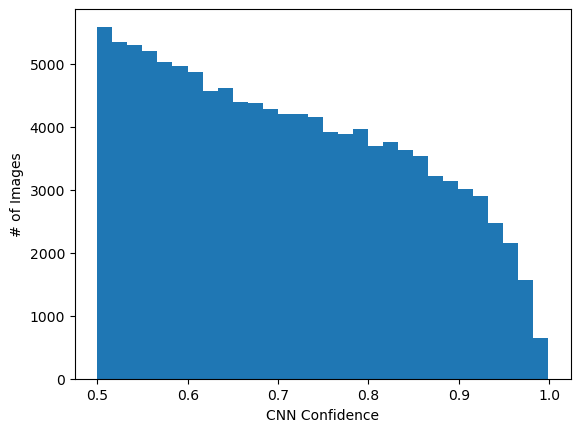

In [88]:
plt.figure()
plt.hist(test_set_predictions[test_set_predictions > 0.5], bins=30)
plt.xlabel("CNN Confidence")
plt.ylabel("# of Images")

In [100]:
plt.close()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes

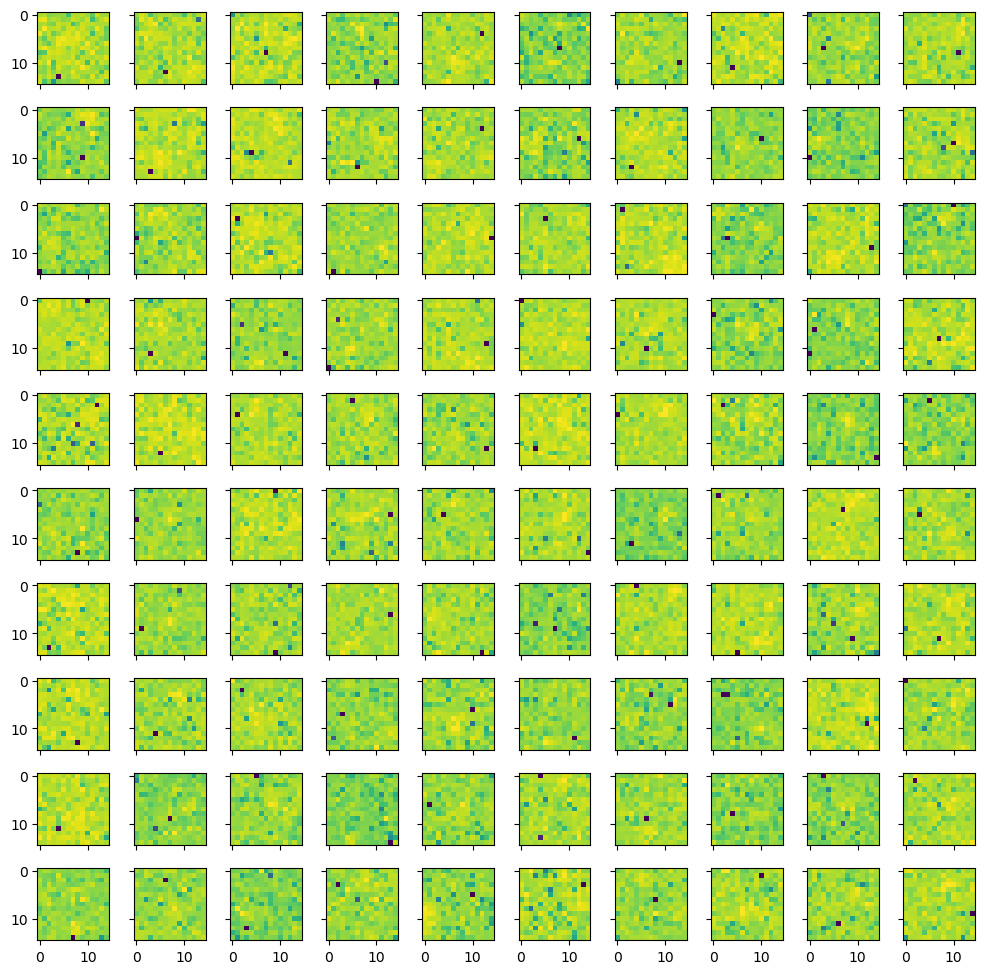

In [113]:
plot_images(list(pos[10700:10800]), n_rows=  10, fig_height=1, norm_same=False)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

images_per_row = 5 
rows_per_page = 5 
images_per_page = images_per_row * rows_per_page

output_pdf = "images_output.pdf"

with PdfPages(output_pdf) as pdf:
    total_images = len(pos)
    
    for i in range(0, total_images, images_per_page):
        fig, axes = plt.subplots(rows_per_page, images_per_row, figsize=(images_per_row * 2, rows_per_page * 2))
        
        page_images = pos[i:i + images_per_page]
        
        for ax, img in zip(axes.flat, page_images):
            ax.imshow(img, cmap='gray')
            ax.axis('off')
        
        for ax in axes.flat[len(page_images):]:
            ax.axis('off')
        
        plt.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

print(f"PDF saved as {output_pdf}")


In [2]:
# len([t for t in test_set_predictions if t > 0.5])

In [114]:
t_a = [t for t in test_set_predictions if t > 0.9]

In [66]:
len(dets)

338611

In [115]:
np.save("./Searches/v3_confidences_pt9threshold", [t for t in test_set_predictions if t >= 0.9])
np.save("./Searches/v3_images_pt9", pos)
np.save("./Searches/v3_all_confidences_S1", test_set_predictions)


In [117]:
np.save("./Searches/v3_detIndexes_pt9_S1", dets)

In [64]:
pos_fil = [full_test[i] for i in range(len(test_set_predictions)) if test_set_predictions[i]>=0.5]

In [393]:
# import numpy as np
# from skimage.filters import sobel

# def has_sharp_edges(img: np.ndarray, edge_thresh) -> (bool, float):
#     edge_map = sobel(img)
#     avg_edge_strength = np.mean(edge_map)
#     return (avg_edge_strength > edge_thresh, avg_edge_strength)

# def extract_images_and_edge_strengths(images, edge_thresh):
#     flagged_images = []
#     non_flagged_images = []
#     flagged_edge_strengths = []
#     for img in images:
#         flag, avg_edge = has_sharp_edges(img, edge_thresh)
#         if flag:
#             flagged_images.append(img)
#             flagged_edge_strengths.append(avg_edge)
#         else:
#             non_flagged_images.append(img)
#     return np.array(flagged_images), np.array(non_flagged_images), np.array(flagged_edge_strengths)

# flagged_images, non_flagged_images, flagged_edge_strengths = extract_images_and_edge_strengths(pos_images[1000:2000], edge_thresh=0.2)
# print("Number of flagged images:", flagged_images.shape[0])
# print("Flagged edge strengths:", flagged_edge_strengths)
# print("Number of non-flagged images:", non_flagged_images.shape[0])


Number of flagged images: 60
Flagged edge strengths: [ 0.30749909  0.20338657  0.26573229  0.20041775  0.20449093  0.20475215
  0.22591229  0.42672375  0.68748216  0.34386107  8.26826473  0.36967635
  0.99294698 20.68443193 15.1753947  16.98310473  0.2934865   7.30148107
 29.67690661 30.66534332  7.45600055  0.27403666  1.34922034  2.32094723
  0.69013643 18.20606565 29.67525073 22.44114277  0.8982241   0.20351266
  0.2936455   5.36696689 28.46660155 30.53831136 10.37595757  0.28845035
  0.44921668 14.48527357 29.39963606 24.77814902  2.44172142  0.25768268
  2.27764233 23.99455102 28.43496968 14.41677291  0.3220299   0.35033436
  9.59246959 29.02061638 25.58751305  4.70971775  0.29465628  0.20959743
  1.11672078 19.12816672 25.80384293 17.30447951  0.59640361  0.23007024]
Number of non-flagged images: 940


In [ ]:
# Experimenting on below cell

In [658]:
import numpy as np
from skimage.filters import sobel
from skimage.measure import label, regionprops

def has_sharp_edges(img: np.ndarray, edge_thresh: float) -> (bool, float):
    edge_map = sobel(img)
    avg_edge_strength = np.mean(edge_map)
    return (avg_edge_strength > edge_thresh, avg_edge_strength)

def is_point_source(img, threshold_factor=2, max_area=12):
    mean_val = np.mean(img)
    std_val = np.std(img)
    thr = mean_val + threshold_factor * std_val
    mask = img > thr
    labeled = label(mask)
    regions = regionprops(labeled)
    large = False
    # plot_images(mask, fig_height=2, title=f"{len(regions)} {regions[0].area}")
    for r in regions:
        if r.area >= max_area:
            large = True
    return not large

def extract_images_and_edge_strengths(images, edge_thresh: float):
    flagged_images = []
    non_flagged_images = []
    flagged_edge_strengths = []
    for img in images:
        flag, avg_edge = has_sharp_edges(img, edge_thresh)
        if flag:
            if is_point_source(img):
                non_flagged_images.append(img)
            else:
                flagged_images.append(img)
                flagged_edge_strengths.append(avg_edge)
        else:
            non_flagged_images.append(img)
    return np.array(flagged_images), np.array(non_flagged_images), np.array(flagged_edge_strengths)

flagged_images, non_flagged_images, flagged_edge_strengths = extract_images_and_edge_strengths(pos_images, edge_thresh=0.2)
print("Number of flagged images:", flagged_images.shape[0])
print("Flagged edge strengths:", flagged_edge_strengths)
print("Number of non-flagged images:", non_flagged_images.shape[0])

Number of flagged images: 700
Flagged edge strengths: [20.68443193 16.98310473 29.67690661 30.66534332 18.20606565 29.67525073
 22.44114277 28.46660155 30.53831136 10.37595757  0.44921668 14.48527357
 29.39963606 24.77814902 23.99455102 28.43496968 14.41677291  9.59246959
 29.02061638 25.58751305  0.20959743 19.12816672 25.80384293 17.30447951
 19.27807803 29.26003653  8.32552098  0.4958813  14.07610924 27.06704216
 22.36167471 23.35640473 12.29174449  9.143606   29.35751023 25.66197772
  0.51877505 17.46103985 29.34069911 24.35094815 27.33471842  0.46721415
 12.28053004 28.54248019 25.61594138 23.69708869 22.51924606 14.28171068
 27.85665665 27.44416829 14.98499699 28.0582338  20.78131348 22.37915767
 27.09738635  9.72660641  9.53030936 27.82930736 23.79209697 24.21409762
 19.03448399 25.12400745 29.52571429 27.17610813 24.91957343 20.51153733
 30.38562295 17.69840905  0.47101112 27.54487541 28.87219934  7.87943617
  0.25735203 12.03606286 29.97867475 12.58566802 23.92357394 29.251303

In [527]:
# def is_point_source(img, threshold_factor=2, max_area=3):
#     mean_val = np.mean(img)
#     std_val = np.std(img)
#     thr = mean_val + threshold_factor * std_val
#     mask = img > thr
#     labeled = label(mask)
#     regions = regionprops(labeled)
#     large = False
#     for r in regions:
#         if r.area >= max_area:
#             print("region check")
#             large = True
#     return large
    
# is_point_source(flagged_images[305], threshold_factor=2, max_area=5)


In [680]:
plt.close()

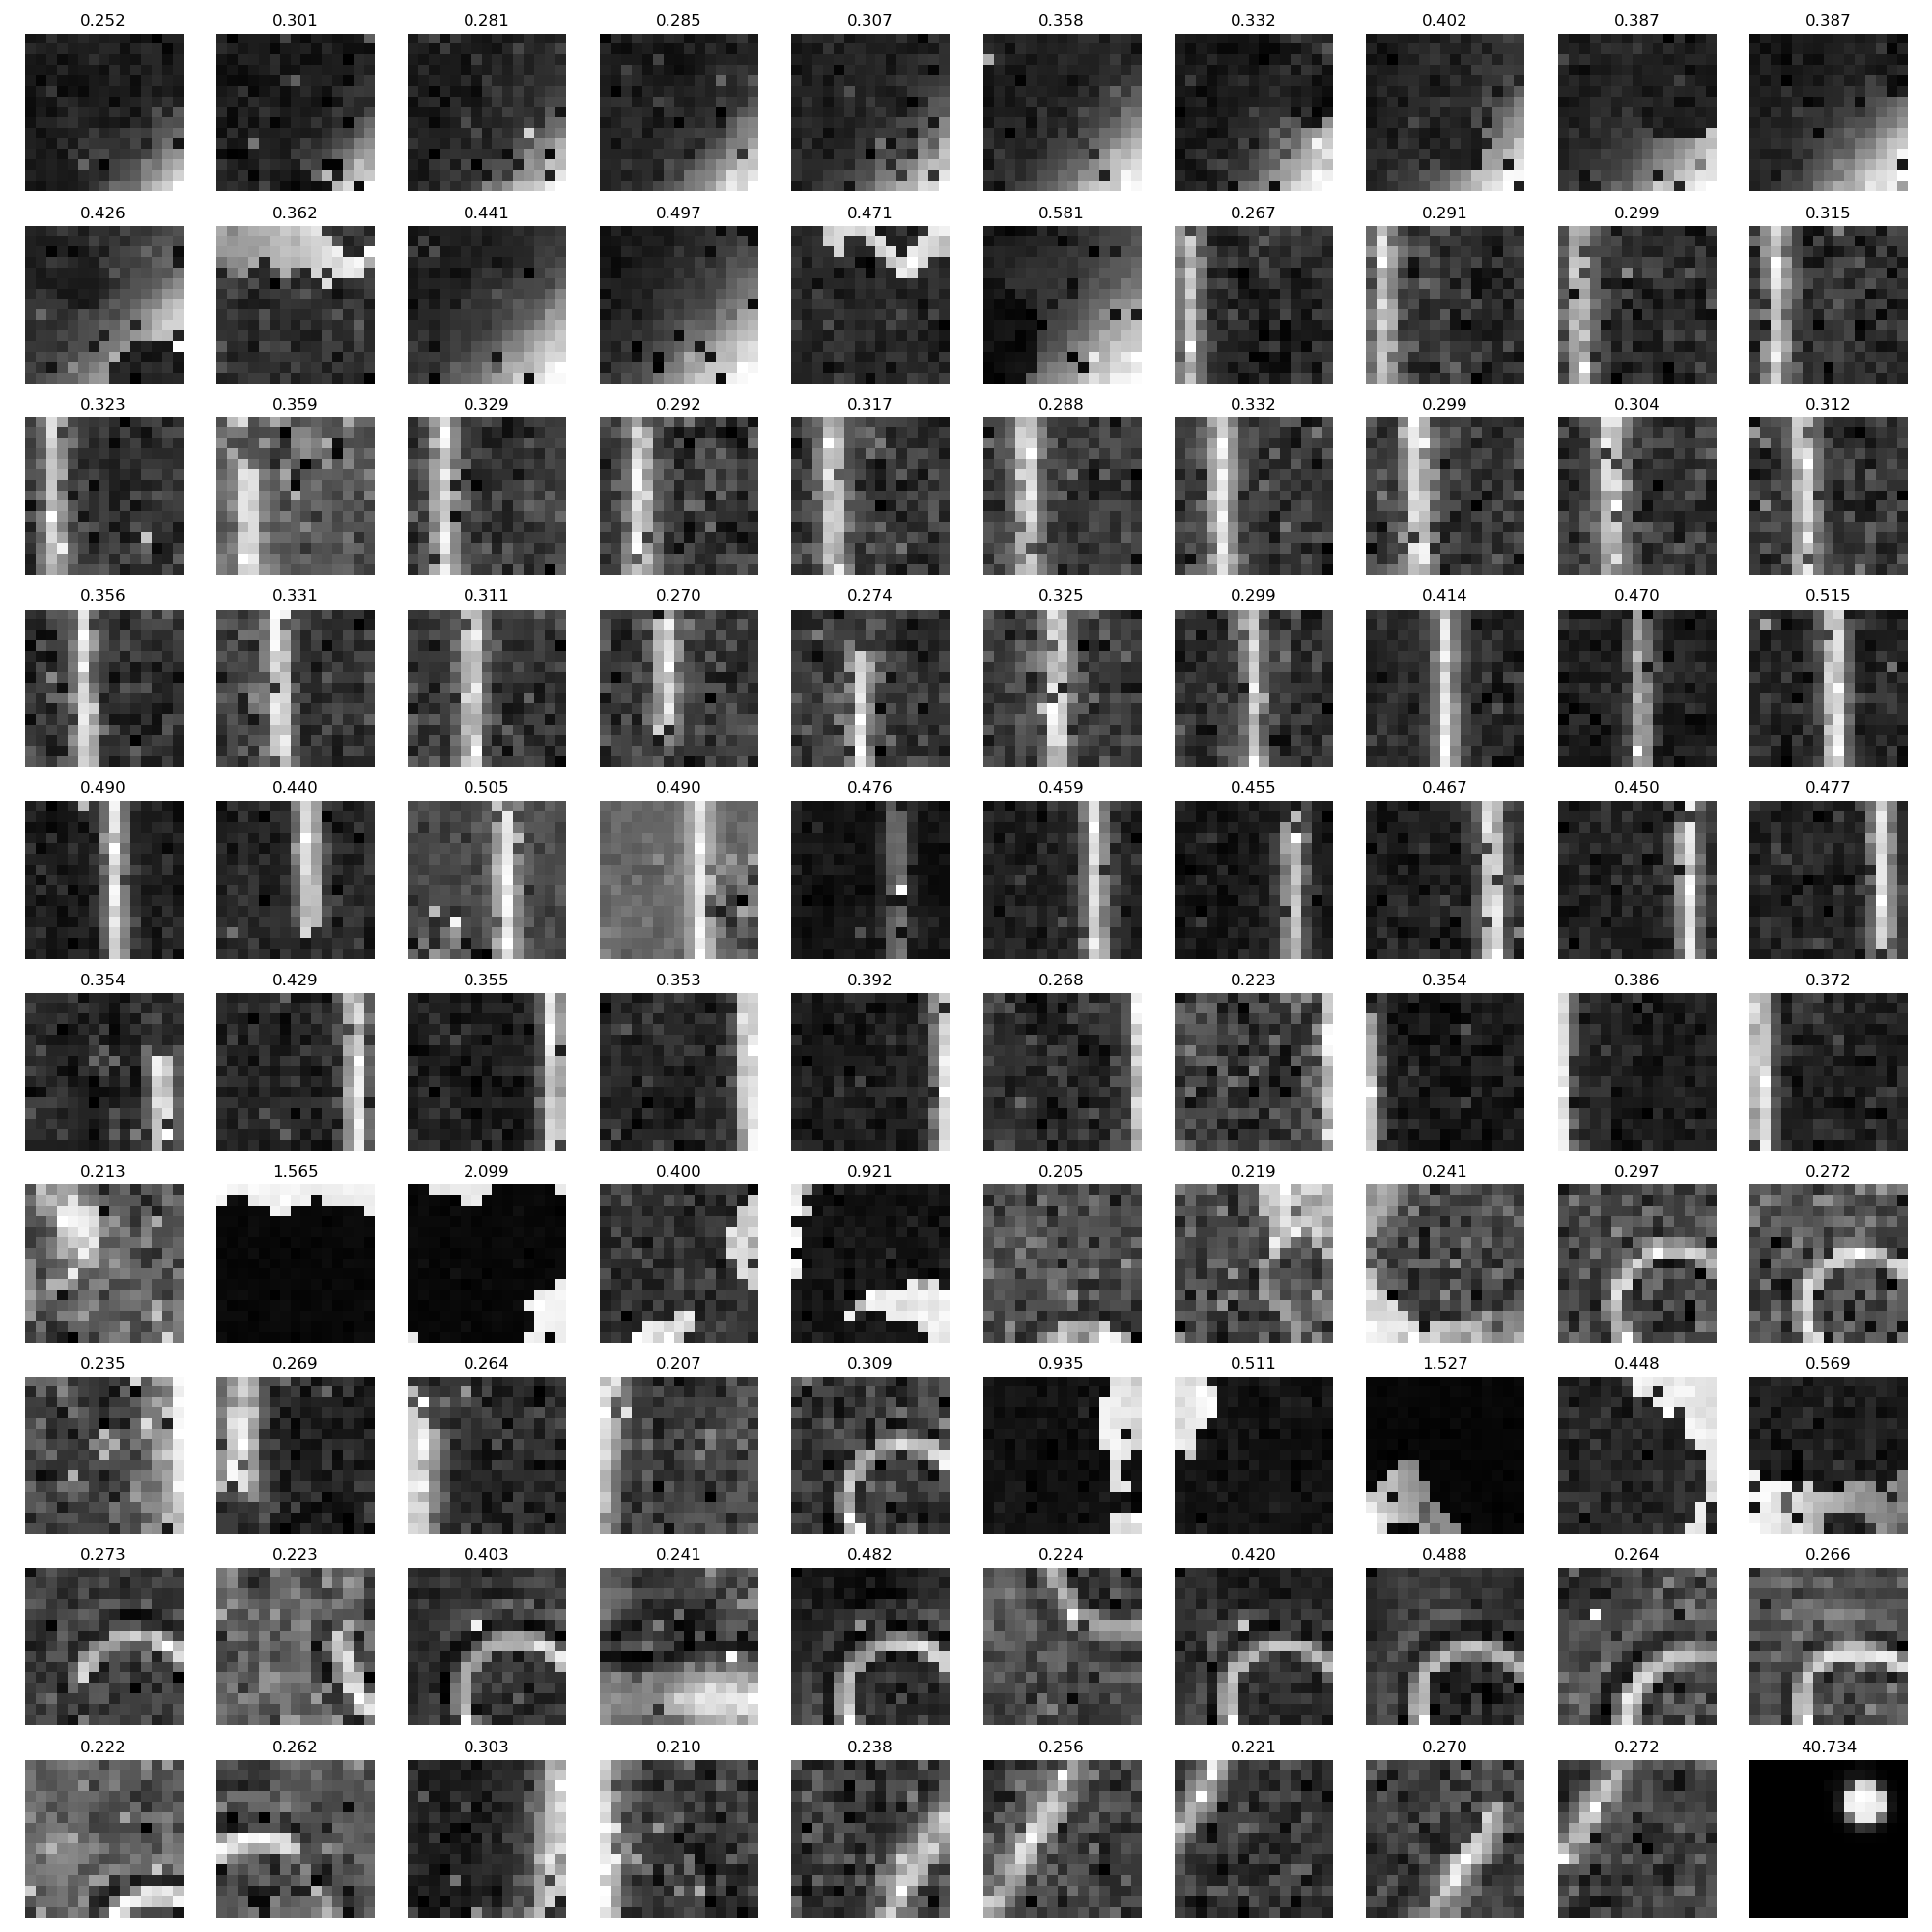

In [662]:
import matplotlib.pyplot as plt
import numpy as np

X = 600
Y = 700
imgs = flagged_images[X:Y]
edges = flagged_edge_strengths[X:Y]
n = len(imgs)
cols = int(np.ceil(np.sqrt(n)))
rows = int(np.ceil(n / cols))
plt.figure(figsize=(cols * 2, rows * 2))
for i in range(n):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(imgs[i], cmap="gray")
    plt.title(f"{edges[i]:.3f}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [681]:
np.save("./TrainingData/V3_Apr12_ArtifactRetrain/Apr12_BlindsearchArtifacts_FalseSet", flagged_images)

# Create Synthetic Hot Pixel Images + Save for training (April 12)

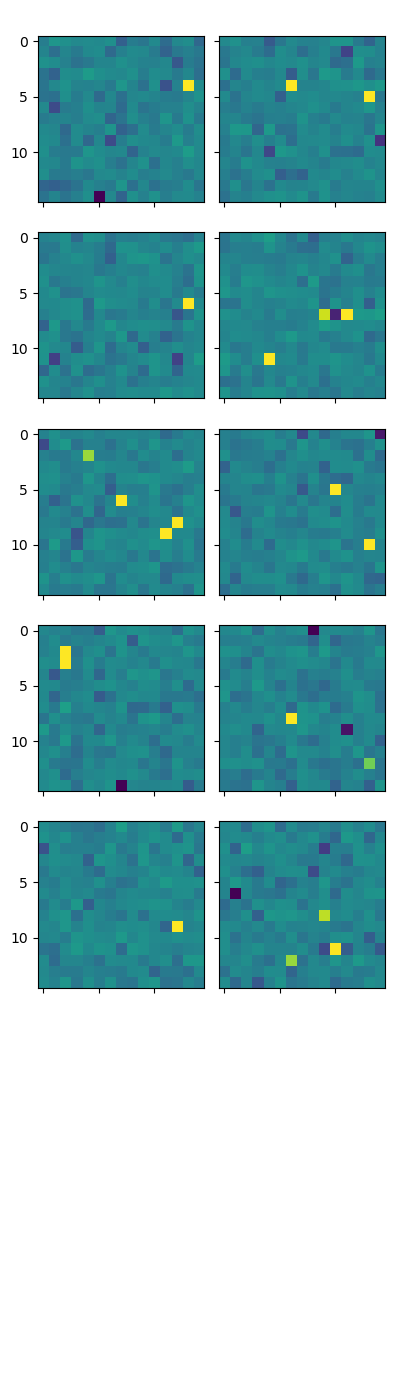

In [436]:
import numpy as np

num_images = 100000
height, width = 15, 15
noise_std = 0.2
images = np.random.normal(0, noise_std, size=(num_images, height, width))

for i in range(num_images):
    for _ in range(np.random.randint(1, 5)):
        x = np.random.randint(0, height)
        y = np.random.randint(0, width)
        images[i, x, y] = np.random.uniform(0.4, 100)

plot_images(list(images[0:10] ),fig_height=2, n_rows=7)

np.save("./TrainingData/V3_Apr12_ArtifactRetrain/Apr12_SynthHotPixel_FalseSet", images)

In [412]:
images.shape

(100000, 15, 15)

In [430]:
plt.close()

In [210]:
# plt.figure()
# plt.hist(flagged_edge_strengths, bins = 200)

In [386]:
# plot_images(list(flagged_images[0:10] ),fig_height=2, n_rows=7)

In [114]:
mask = np.abs(test_set_predictions-0.9) < 0.05

In [ ]:
# check noise

In [132]:
for bin in [0.9, 0.6, 0.2]:
    
    mask = np.abs(test_set_predictions-bin) < 0.05

    ixs = np.random.permutation(len(full_test))[mask][:20]
    
    ims = full_test[ixs]
    
    break
    
    axs = plot_images([i for i in full_test[mask][:20]], fig_height=4, n_rows=5)

    # for i, ax in enumerate(axs):


In [137]:
from astropy.stats import sigma_clipped_stats 

In [138]:
# sds = np.std(full_test, axis=(1,2))

sds = sigma_clipped_stats(full_test, axis=(1,2))

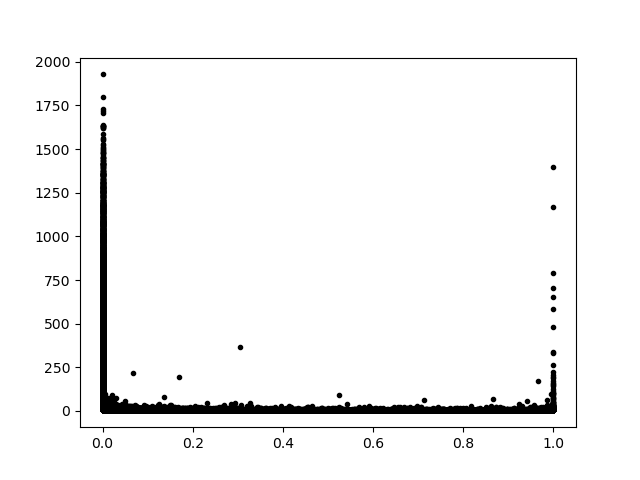

In [140]:
plt.figure()
plt.plot(test_set_predictions,sds[2], ".k")

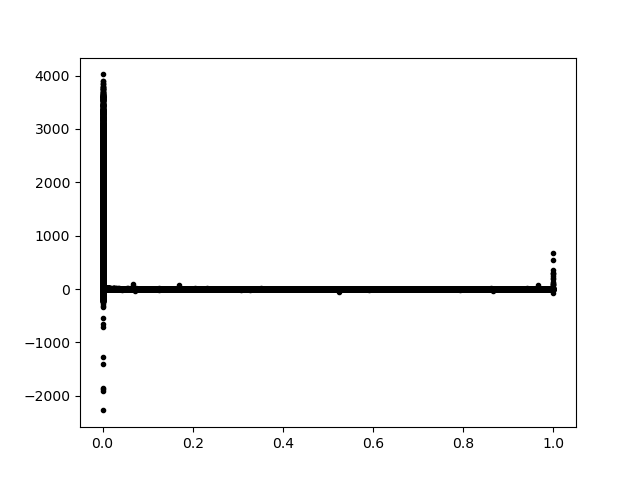

In [141]:
plt.figure()
plt.plot(test_set_predictions,sds[0], ".k")

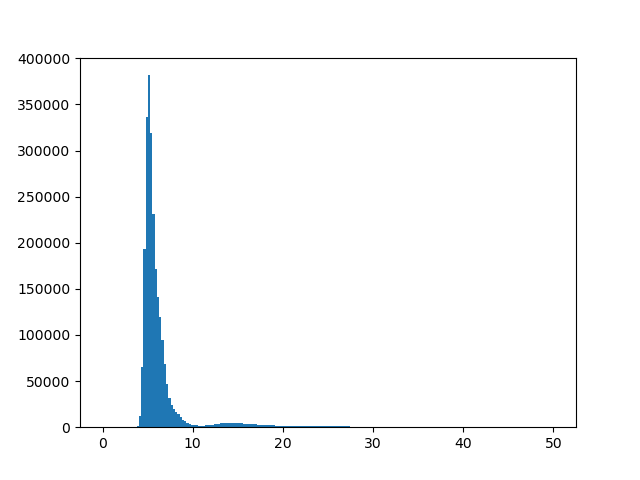

In [146]:
plt.figure()
plt.hist(sds[2], bins=np.linspace(0,50,200));

In [153]:
dataset = dict(
    art = np.load("../SummerWork/Deploys/4k_artifactsFromOct13Search_fromModelV4_thresholdPt9.npy"),
    false_set = np.load("../SummerWork/TrainingData/100kFalseCleanedImages.npy"),
    t1 = np.load("../SummerWork/TrainingData/100k_Oct24RedoneSyntheticImages_BRIGHT_SNR8over.npy"),
    t2 = np.load("../SummerWork/Nov3_50k_SynthTrue_ErodeImplant_oct27UpdateBkg_Amp11to30.npy")
    
)

stats = {}

for k, data in dataset.items():
    stats[k] = sigma_clipped_stats(data, axis=(1,2))


In [164]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
scores={}
for k, data in dataset.items():
    
    stats[k] = sigma_clipped_stats(data, axis=(1,2))
    

    with tf.device(proc_hardware_name):
        
        scores[k] = model.predict(data).flatten()



1563/1563 [==============================] - 6s 4ms/step


In [188]:
fp = scores["false_set"] > 0.2

sum(fp), len(fp)

(2525, 100000)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

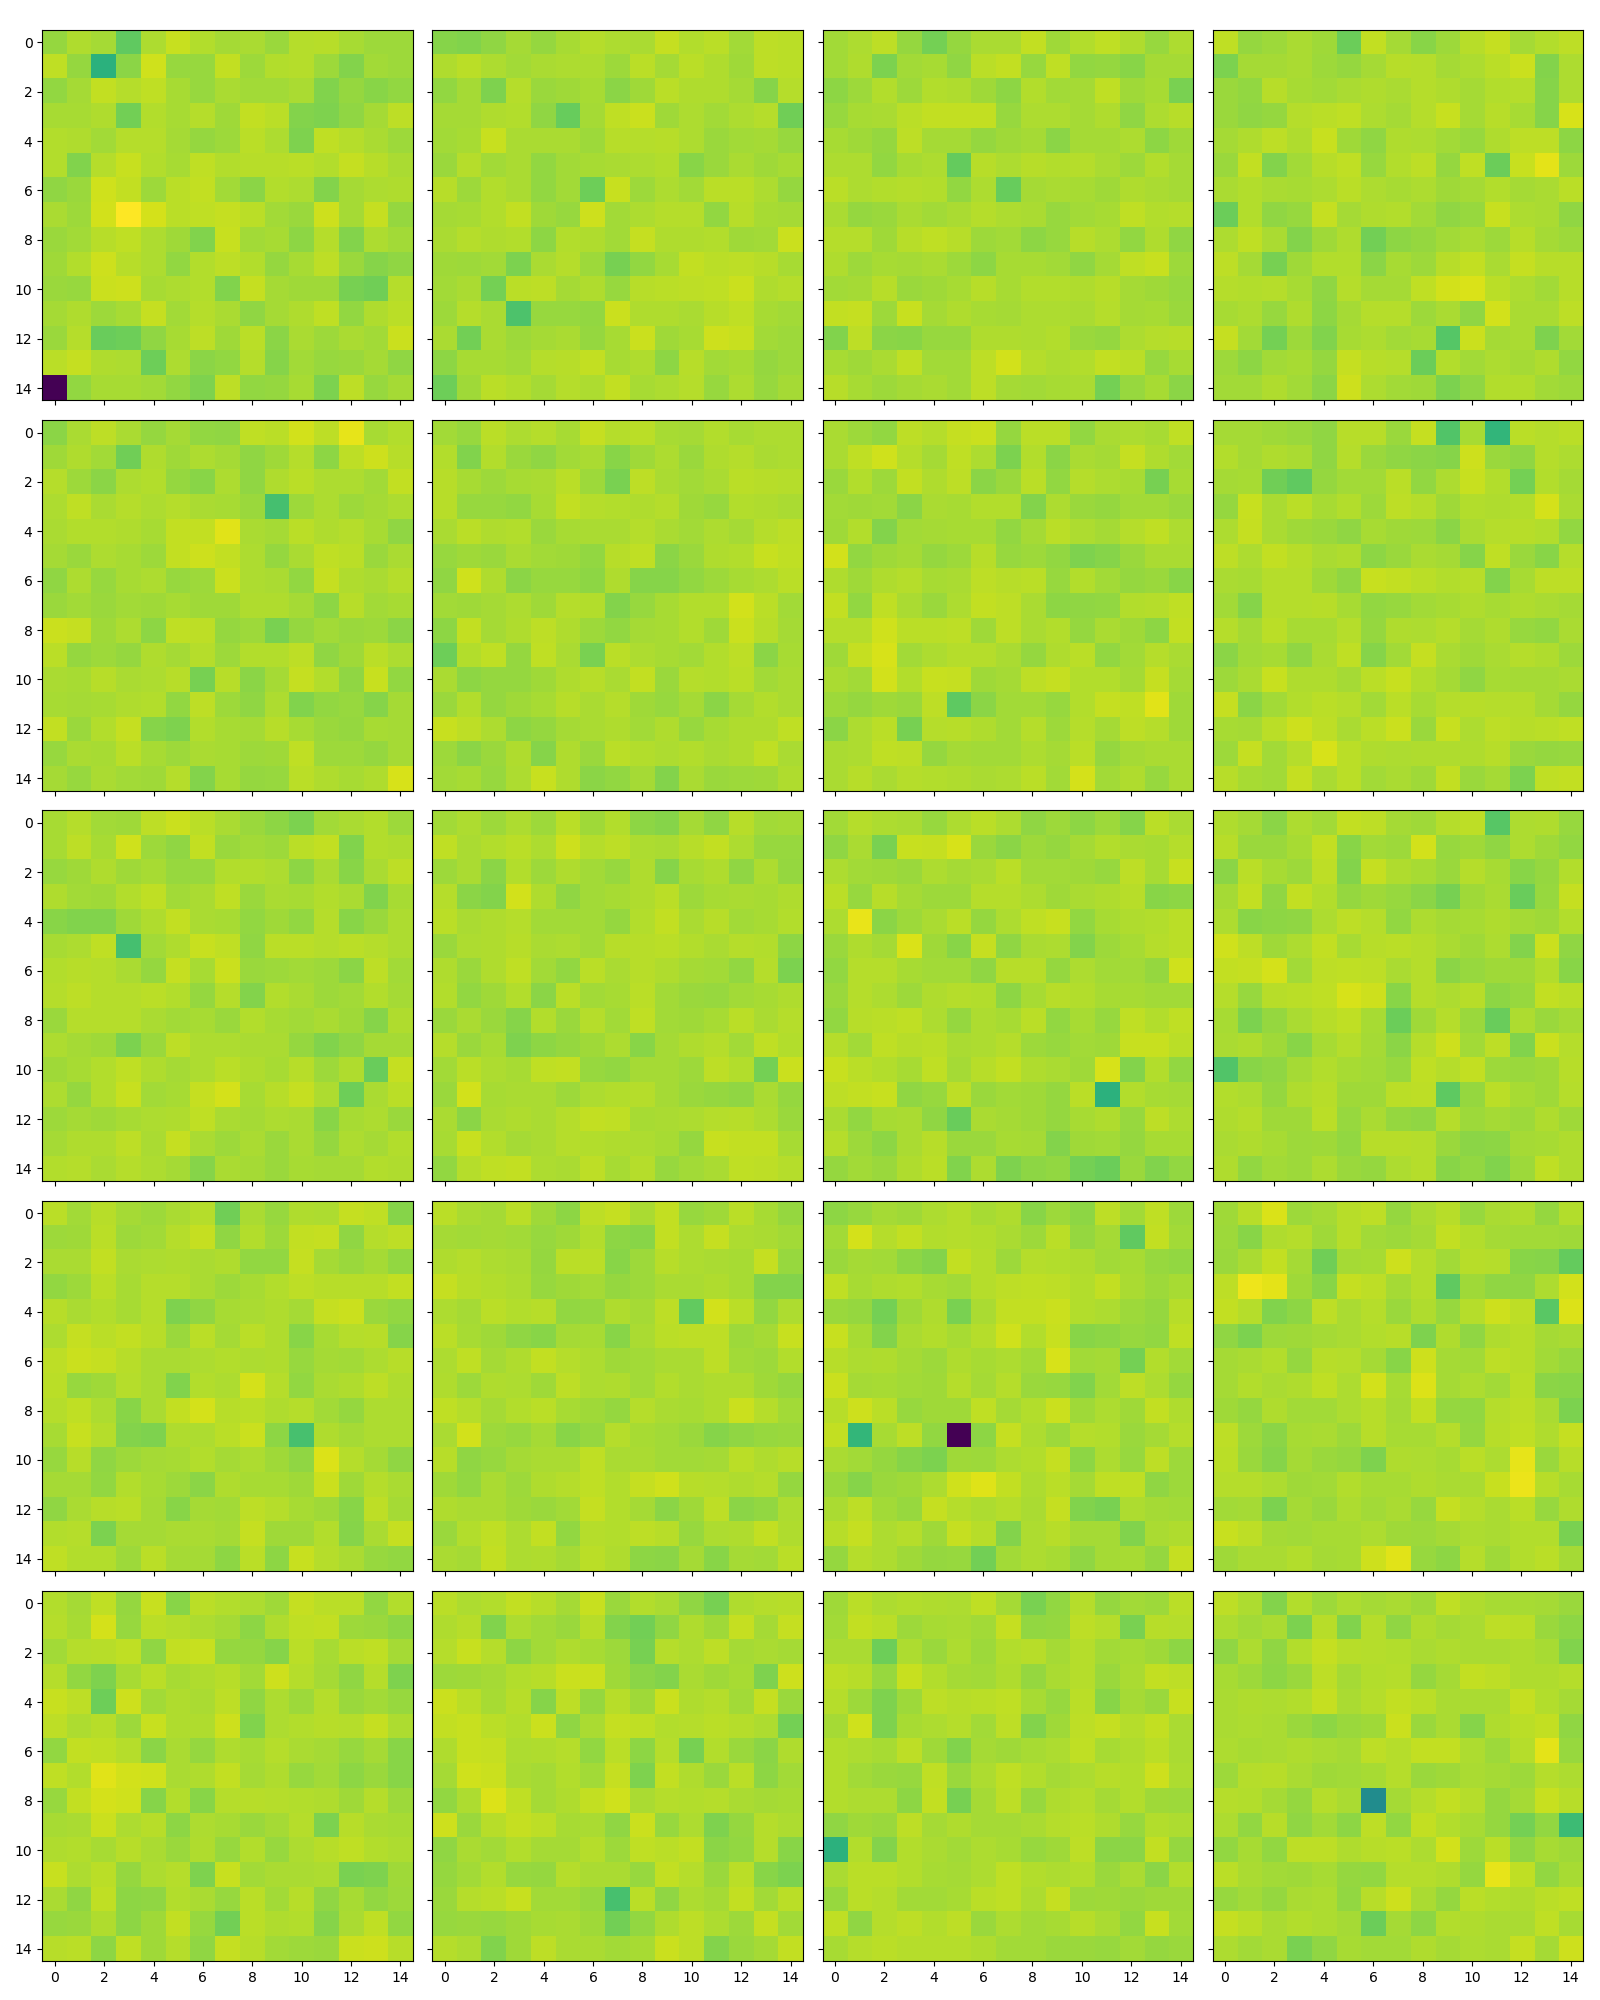

In [189]:
plot_images([i for i in dataset["false_set"][fp]][:20], fig_height=4, n_rows=5)

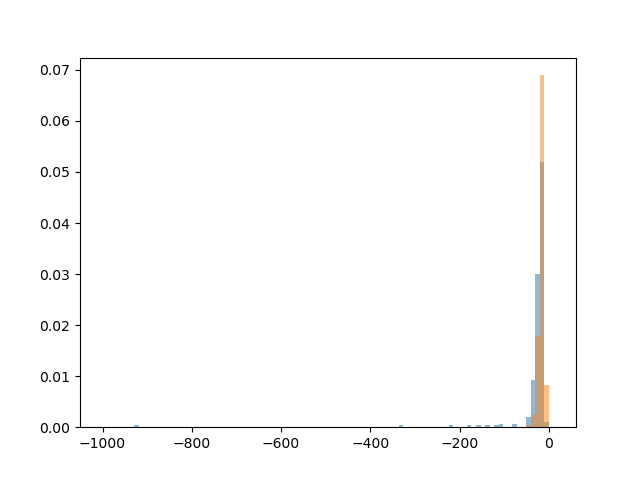

In [185]:
plt.figure()
bins = np.linspace(-1000, 10, 100)
plt.hist([np.min(i) for i in dataset["t1"][fn]], density=True, bins=bins, alpha=0.5);
plt.hist([np.min(i) for i in dataset["t1"][~fn]], density=True, bins=bins, alpha=0.5);

(297, 100000)

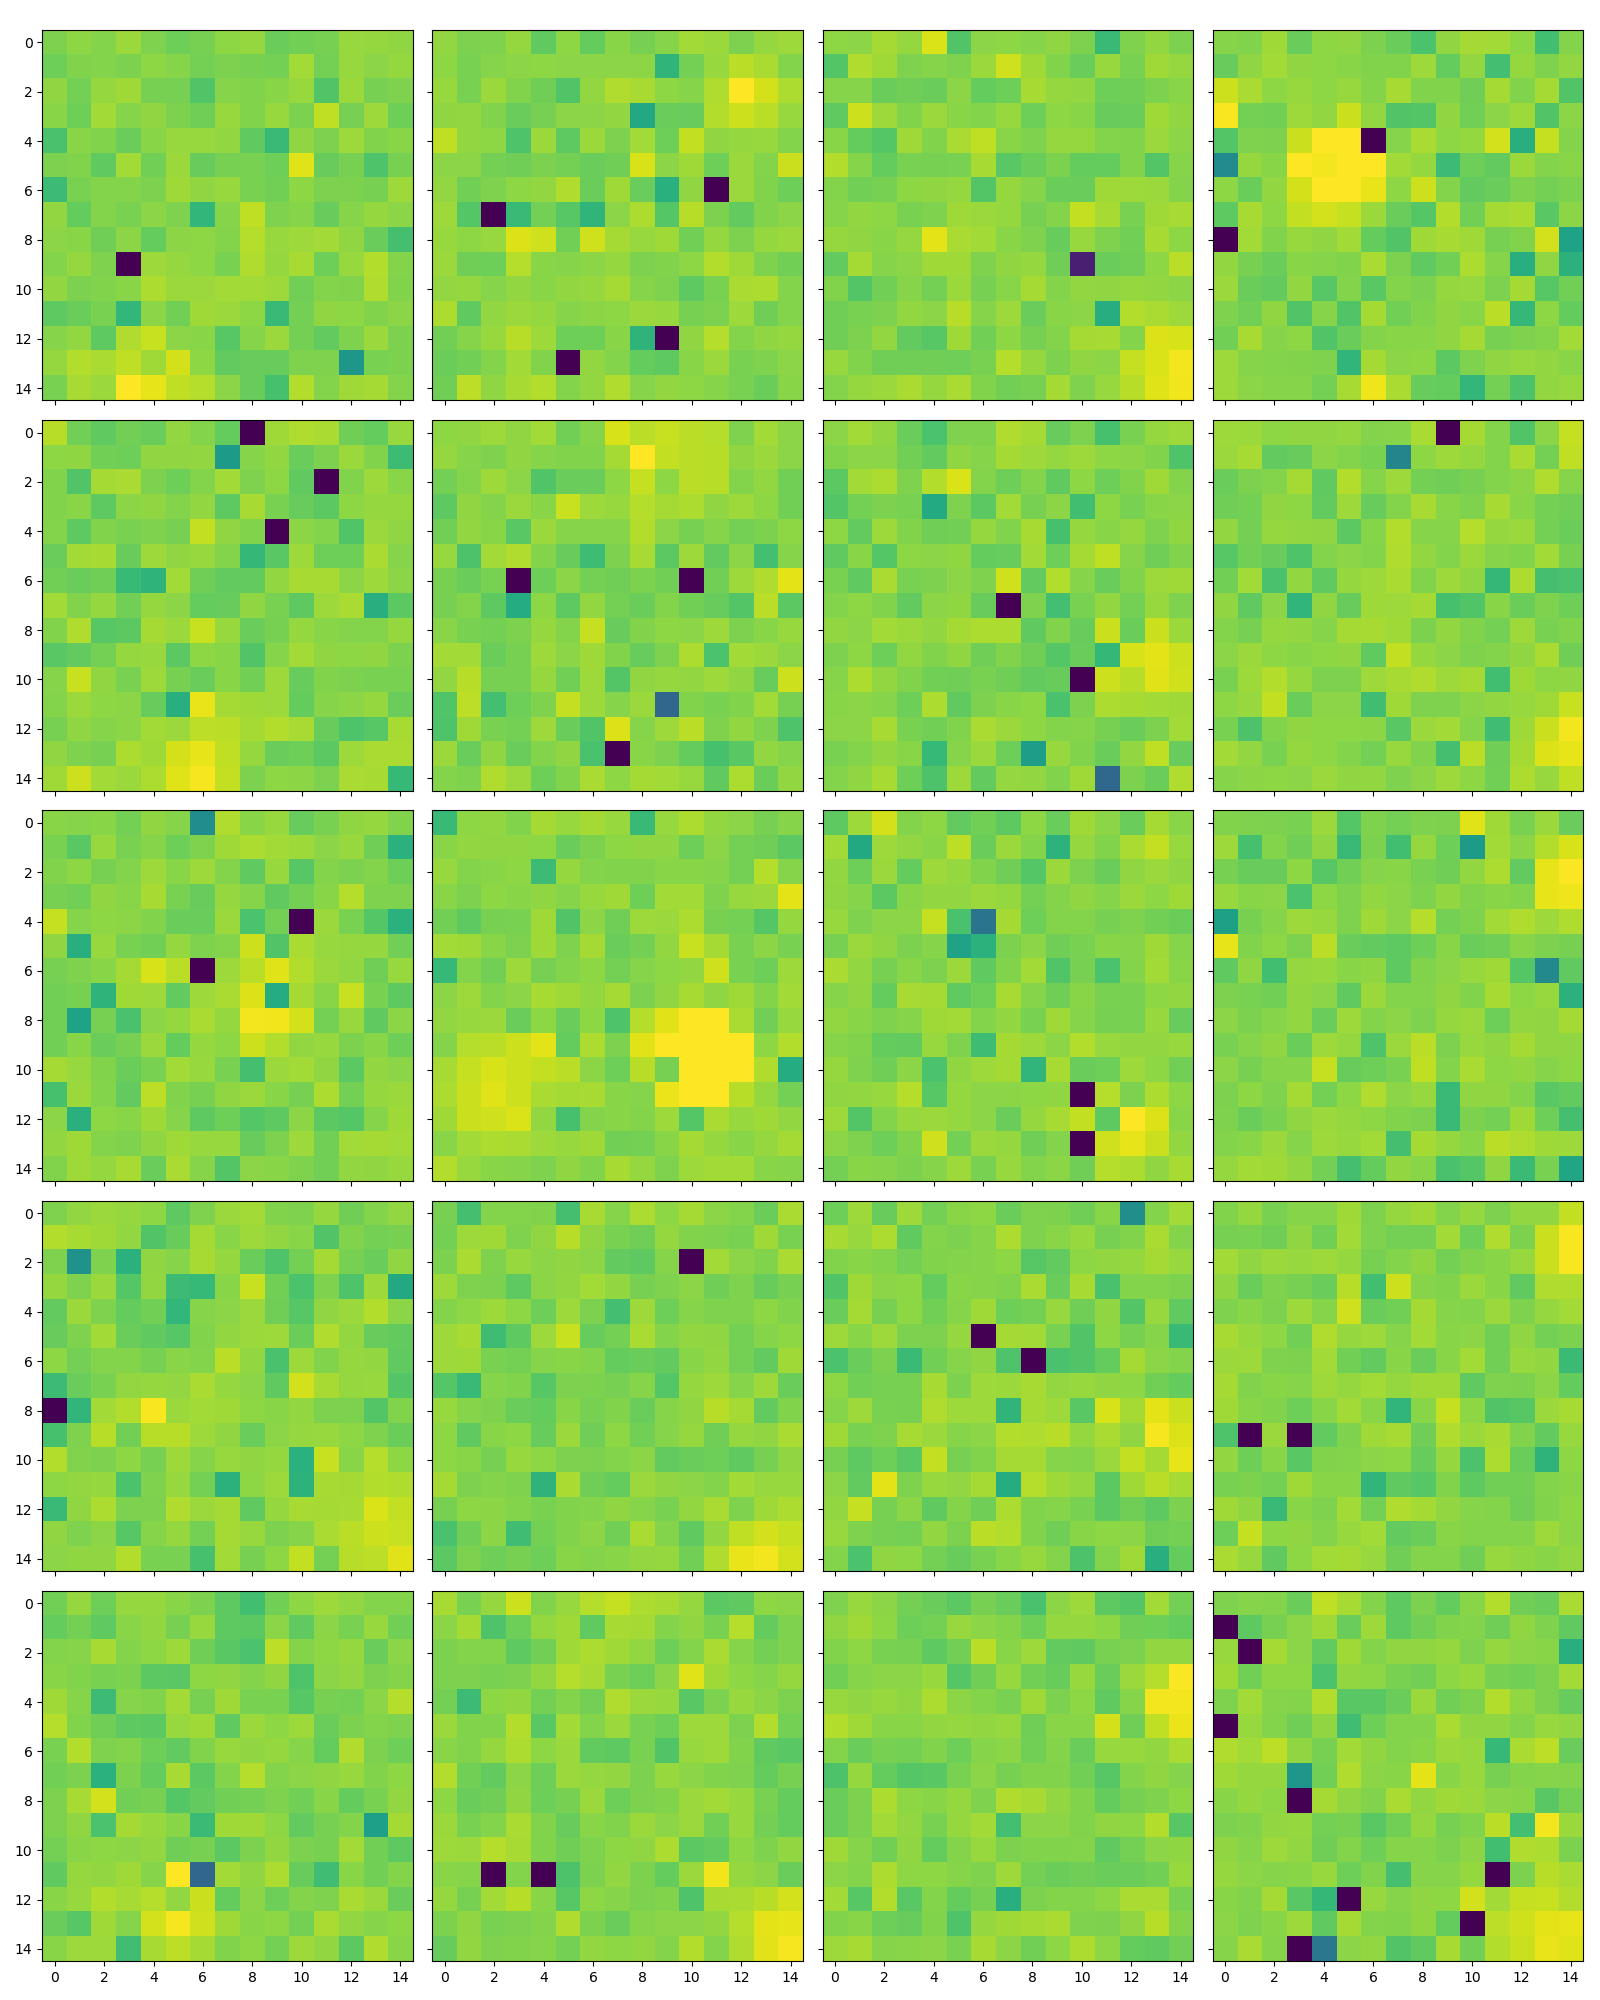

In [179]:
fn = scores["t1"] < 0.2

plot_images([i for i in dataset["t1"][fn]][:20], fig_height=4, n_rows=5)

sum(fn), len(fn)


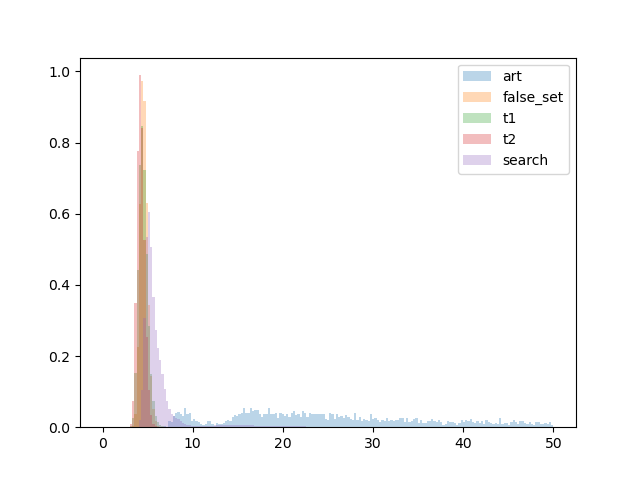

In [161]:


plt.figure()

for k, data in stats.items():

    plt.hist(data[2], bins=np.linspace(0,50,200), alpha=0.3, label=k, density=True);

plt.hist(sds[2], bins=np.linspace(0,50,200), alpha=0.3, label="search", density=True);
plt.legend()



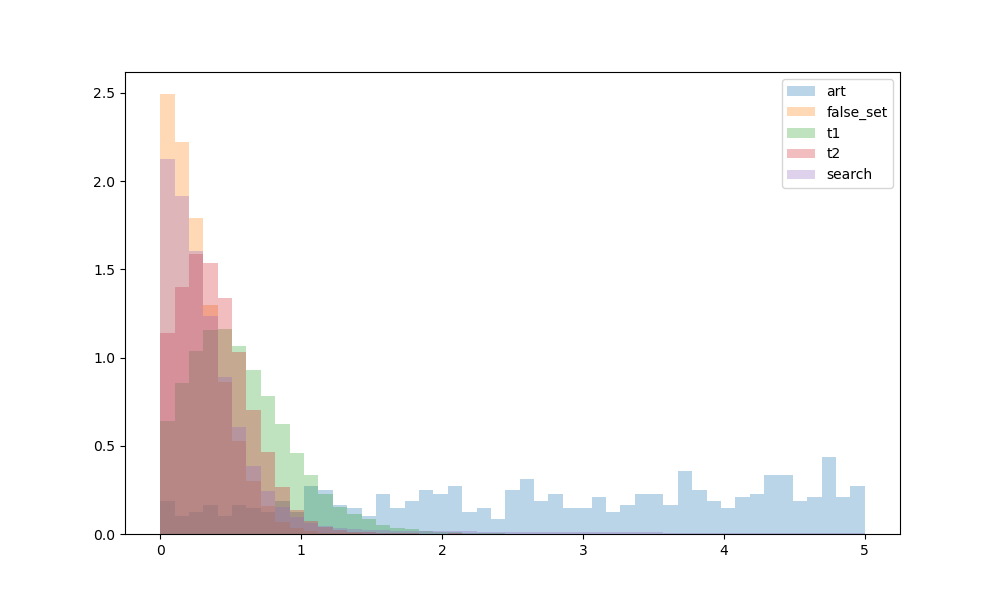

In [163]:


plt.figure(figsize=(10,6))

for k, data in stats.items():

    plt.hist(data[0], bins=np.linspace(0,5,50), alpha=0.3, label=k, density=True);

plt.hist(sds[0], bins=np.linspace(0,5,50), alpha=0.3, label="search", density=True);
plt.legend()



In [172]:
def calculate_snr_normalized(image_data, position, aperture_radius, annulus_radii, sigma=0.2):
    aperture = CircularAperture(position, r=aperture_radius)
    annulus = CircularAnnulus(position, r_in=annulus_radii[0], r_out=annulus_radii[1])
    aperture_phot = aperture_photometry(image_data, aperture)
    signal = aperture_phot['aperture_sum'][0]
    
    annulus_phot = aperture_photometry(image_data, annulus)
    bkg_mean = annulus_phot['aperture_sum'][0] / annulus.area
    bkg_total = bkg_mean * aperture.area
    net_signal = signal - bkg_total
    
    N_pixels = aperture.area
    total_noise = sigma * np.sqrt(N_pixels)
    
    snr = net_signal / total_noise if total_noise != 0 else 0
    
    return snr

In [173]:
knowns = np.load("../2025Work/15px_W2_masks_real_asteroids_randomized.npy")
knowns_centers = np.load("../2025Work/15px_W2_masks_randomized_coords.npy")
knowns_SNRs = [calculate_snr_normalized(im, position=(center[0], center[1]), aperture_radius=2, annulus_radii=[3,4]) for im, center in zip(knowns, knowns_centers)]

In [190]:
centers = np.load("../2025Work/15px_W2_masks_randomized_coords.npy")
threshold = 0.5
subset_images = [f_test[i] for i in range(len(f_test)) if (test_set_predictions_known[i] >= threshold) & (test_set_gt[i] == 1.0)]
subset_images = np.array(subset_images)
coords = [centers[i] for i in range(len(f_test)) if (test_set_predictions_known[i] >= threshold) & (test_set_gt[i] == 1.0)]

In [191]:
"""
images that model says ARE asteroids
all SNRs of asteroids
"""
import numpy as np
import matplotlib.pyplot as plt
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
from matplotlib.patches import Circle
from kevlib.utils.plot import plot_images

In [192]:
pred_SNRs = [calculate_snr_normalized(im, position=(center[0], center[1]), aperture_radius=1.5, annulus_radii=[3,4]) for im, center in zip(subset_images, coords)]

In [193]:
len(pred_SNRs)

78

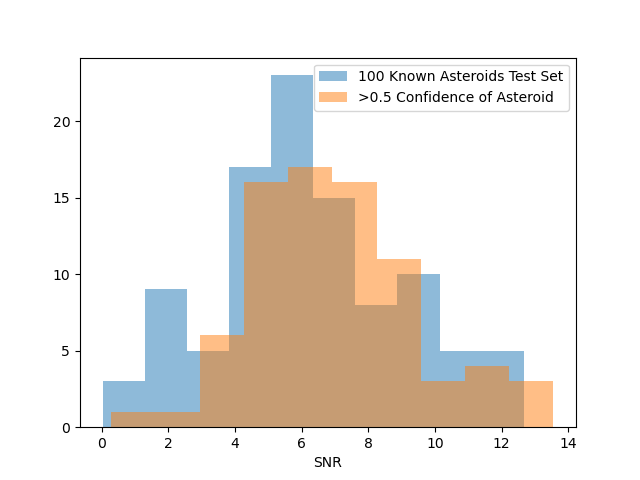

In [195]:
plt.figure()
plt.hist(knowns_SNRs, density=False, alpha=0.5, label="100 Known Asteroids Test Set", bins=10)

plt.hist(pred_SNRs, density=False, alpha=0.5, label = ">0.5 Confidence of Asteroid", bins = 10)
plt.xlabel("SNR")
plt.legend()